# Problem statment

# E-retail factors for customer activation and retention: A case study from Indian e-commerce customers
Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel(r'D:\Desktop\intership 31\customer_retention_dataset.xlsx')
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

# RAW DATA PREPROCESSING

In [7]:
df.shape

(269, 71)

- the number of rows are 269.
- the number of columns are 71

In [8]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [9]:
#Checking types of datset
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [24]:
#Identifying the object type Columns
df.dtypes[df.dtypes == 'object'].count()

70

so we have total 70 object type rows prsent in the dataset

In [10]:
#Will separate categorical and numerical columns
categorical_cols = []
numerical_cols = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)
print('Categorical Columns are : ', categorical_cols)
print('************************************************************************************************************************')
print('Numerical Columns are: ', numerical_cols)


Categorical Columns are :  ['1Gender of respondent', '2 How old are you? ', '3 Which city do you shop online from?', '5 Since How Long You are Shopping Online ?', '6 How many times you have made an online purchase in the past 1 year?', '7 How do you access the internet while shopping on-line?', '8 Which device do you use to access the online shopping?', '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ', '10 What is the operating system (OS) of your device?\t\t\t\t                                          ', '11 What browser do you run on your device to access the website?\t\t\t                                                          ', '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ', '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ', '14 How much t

In [12]:
#checking null values

df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

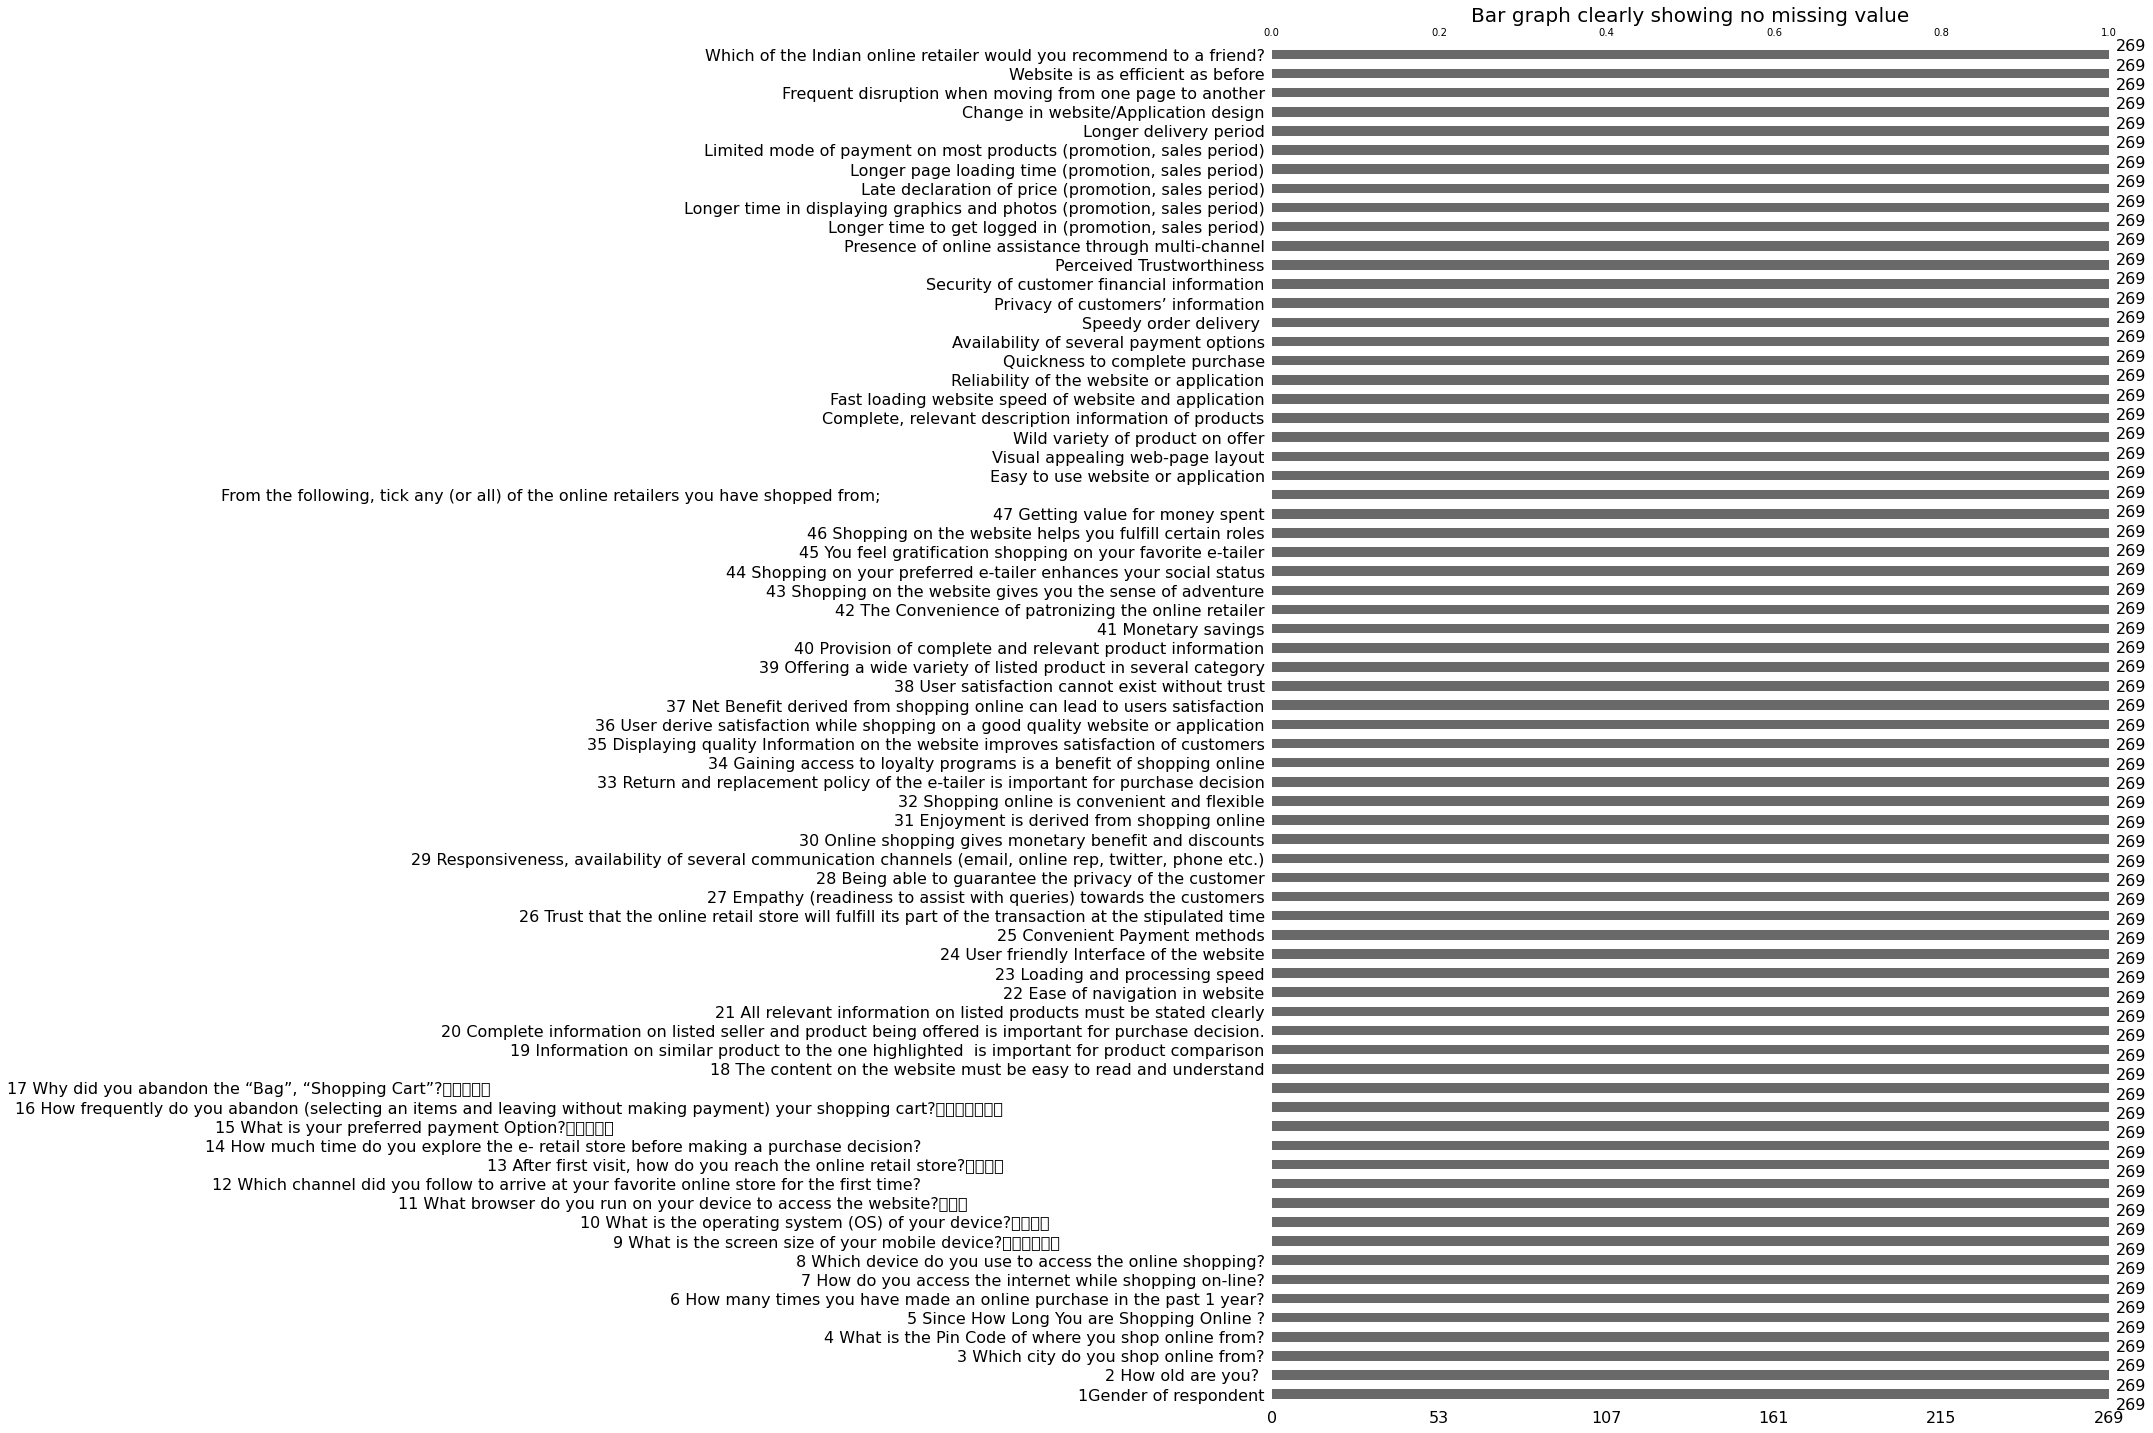

In [16]:
import missingno as ms
ms.bar(df,figsize=(15,25))
plt.title("Bar graph clearly showing no missing value",size=20);

<AxesSubplot:>

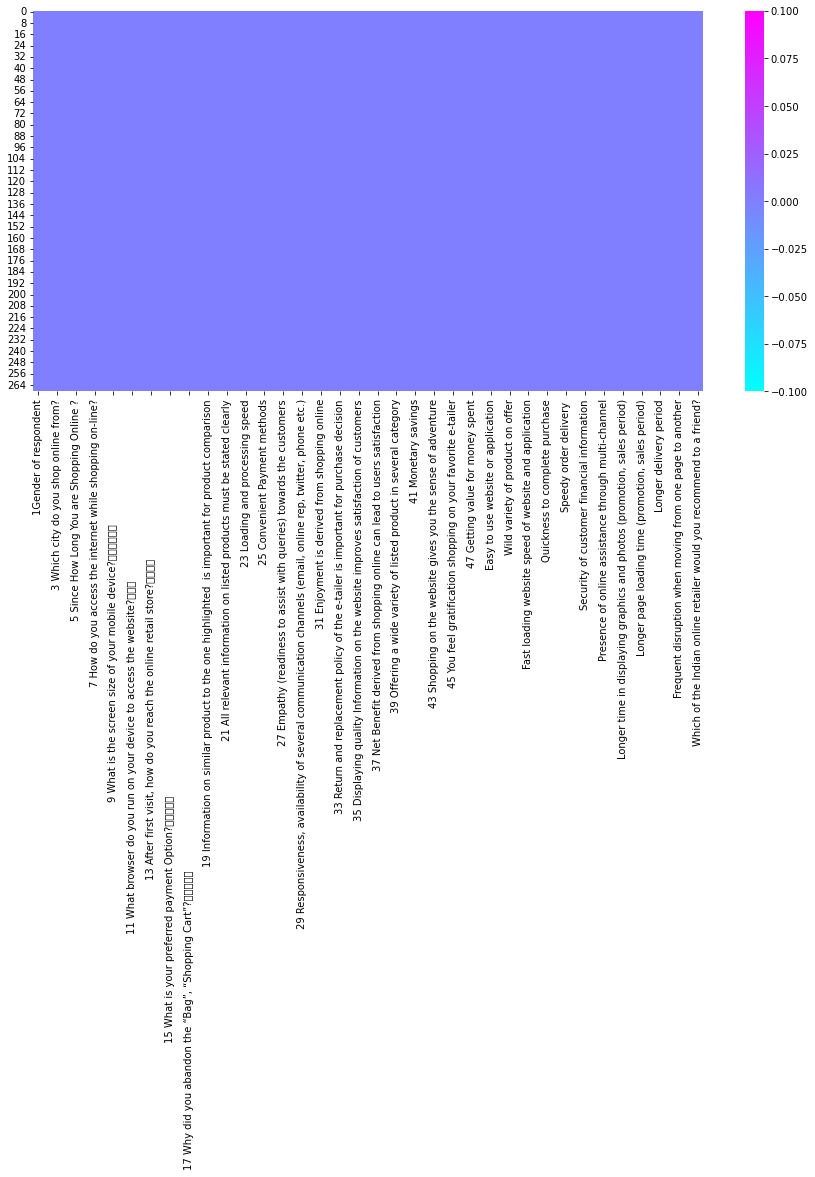

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isna(), cmap='cool')

# from the above two graph it has been proved that there is no null value exists in any of the columns.

# Getting the summary of the Dataset cols

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [22]:
df.describe()

4 What is the Pin Code of where you shop online from?
count                                         269.000000    
mean                                       220465.747212    
std                                        140524.341051    
min                                        110008.000000    
25%                                        122018.000000    
50%                                        201303.000000    
75%                                        201310.000000    
max                                        560037.000000

observation
- As describe method only shows numerical values detail list and only one numerical column is present so it provides deatail of that column. i have noticed a very little jump in the from 50% to 75% as compared to 25% to 50% and 75% to maximum.

# Data Exploration with consumer analysis

# 1. GENDERWISE ANALYSIS

In [25]:
df['1Gender of respondent'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
df['1Gender of respondent'].value_counts()

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

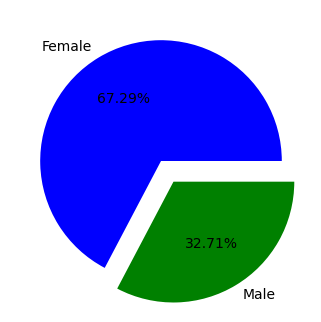

In [27]:
#lets plot pie chart to visualize

labels = ['Female','Male']
fig, ax = plt.subplots(dpi=100)
cl = ['blue','green']
plt.legend
exp = [0.0,0.2]
plt.pie(df['1Gender of respondent'].value_counts(),labels = labels,explode = exp,radius =1, autopct = '%1.2f%%', shadow=False,colors=cl)
plt.show()

Text(0.5, 1.0, 'Male VS female')

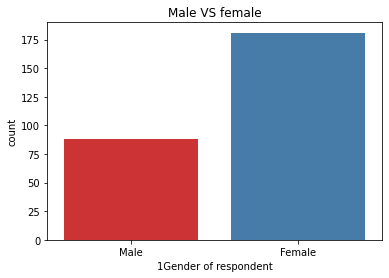

In [28]:
sns.countplot(df['1Gender of respondent'], palette="Set1")
plt.title('Male VS female')

it has clearly observed that number of female is more than male in this column

# 2. AGE DESCRIPTION

In [44]:
pd.DataFrame(df['2 How old are you? '].unique())

0
0         31-40 years
1         21-30 years
2         41-50 yaers
3  Less than 20 years
4  51 years and above

In [47]:
df['2 How old are you? '].value_counts()

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64

Text(0.5, 1.0, 'Online Shopping done by  difftent  age  groups of  the society')

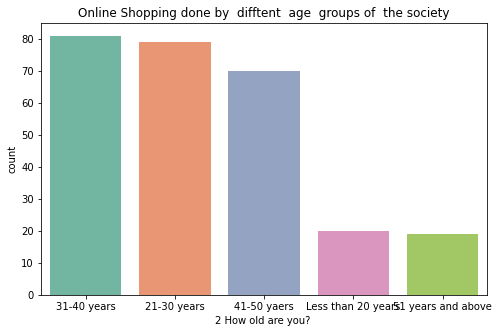

In [248]:
plt.figure(figsize=(8,5),facecolor='white')
sns.countplot(df['2 How old are you? '], palette="Set2")
plt.title('Online Shopping done by  difftent  age  groups of  the society')

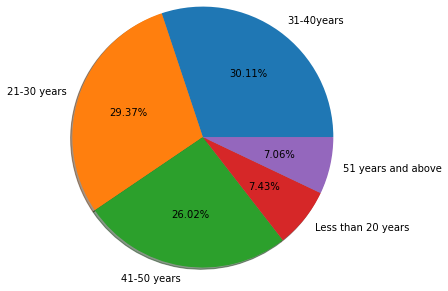

In [50]:
labels = '31-40years','21-30 years','41-50 years','Less than 20 years','51 years and above'
fig, ax = plt.subplots()
ax.pie(df['2 How old are you? '].value_counts(),labels = labels,radius =1.5,autopct = '%1.2f%%', shadow=True,)
plt.show()

from the above graph we conclude that online shopping done by the age group 31 to 40 years is more as compared to any other age group

# 3. online shopping analysis citywise

In [51]:
df['3 Which city do you shop online from?'].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

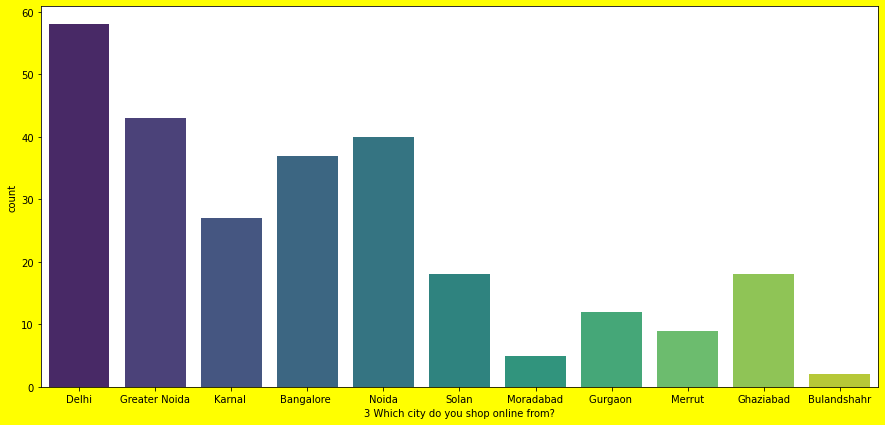

In [61]:
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(df['3 Which city do you shop online from?'], palette="viridis")

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='Count'>

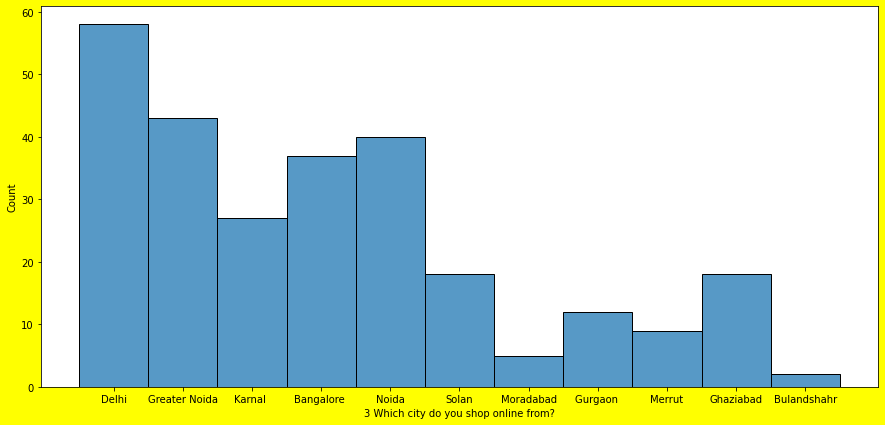

In [69]:
plt.figure(figsize=(15,7),facecolor='yellow')
sns.histplot(data=df,x='3 Which city do you shop online from?')

 Delhi top the list in online shopping follwed by greater noida and then noida

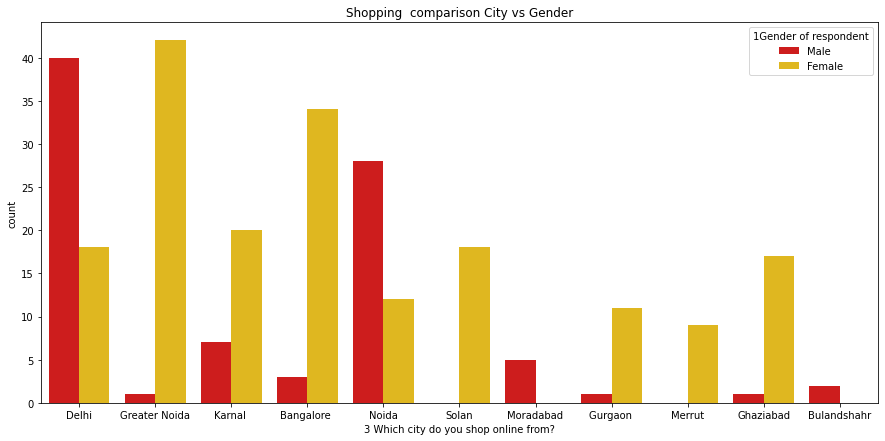

In [73]:
plt.figure(figsize=(15,7),facecolor='white')
sns.countplot(df['3 Which city do you shop online from?'], hue=df['1Gender of respondent'], palette='hot')
plt.title('Shopping  comparison City vs Gender');

# Amazing result:
    In Delhi,noida,moradabad,bulandsahar online shopping done by male is far more greater than female but in  Greaternoida,  karnal, Banglore,gurgaon, merrut , Ghaziabd female outnumbered male in shopping.

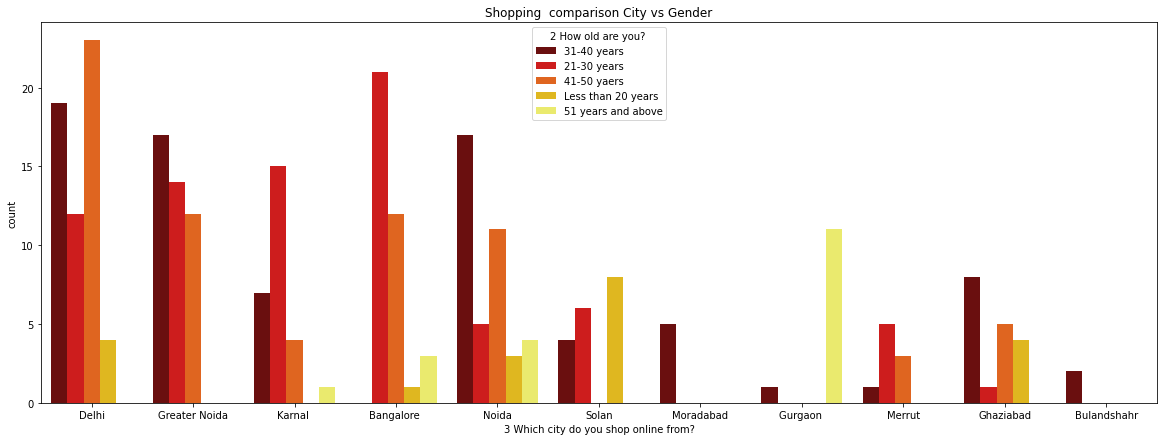

In [78]:
plt.figure(figsize=(20,7),facecolor='white')
sns.countplot(df['3 Which city do you shop online from?'], hue=df['2 How old are you? '], palette='hot')
plt.title('Shopping  comparison City vs Gender');

in Delhi shopping done by 41 to 50 years age group are in abundant whearas in greater noida and noida 31 to 40 year age group lead the chart 
in shopping

# 4. online shopping timeperiod

In [80]:
df['5 Since How Long You are Shopping Online ?'].value_counts()

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

Observations :
as we  can see  that there  are max  person  who have been shopping  for  4 yrs
followed  by  2-3 yrs

Text(0.5, 1.0, 'How many years of Customer online shopping experience')

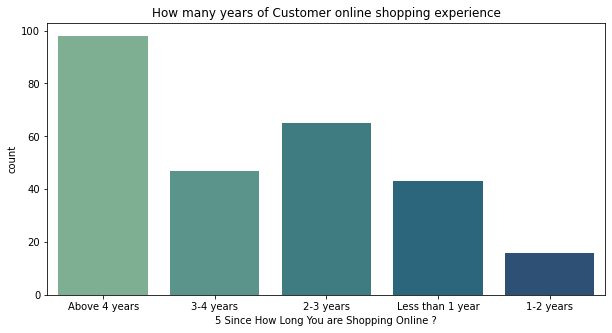

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(df['5 Since How Long You are Shopping Online ?'], palette="crest")
plt.title('How many years of Customer online shopping experience')

# 5. Last one year record

In [83]:
df['6 How many times you have made an online purchase in the past 1 year?'].value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

<AxesSubplot:xlabel='6 How many times you have made an online purchase in the past 1 year?', ylabel='count'>

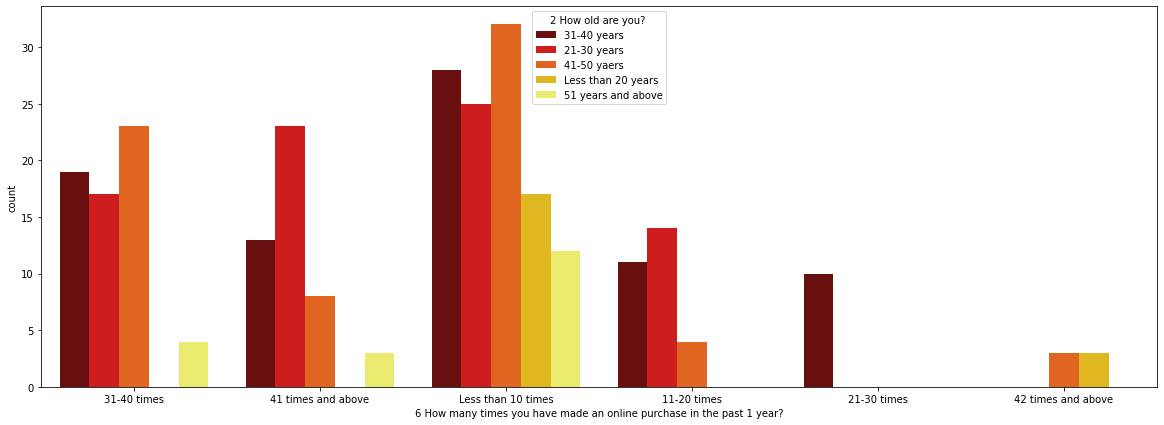

In [84]:
plt.figure(figsize=(20,7),facecolor='white')
sns.countplot(df['6 How many times you have made an online purchase in the past 1 year?'], hue=df['2 How old are you? '], palette='hot')

# 6. Internet penetration

In [85]:
df['7 How do you access the internet while shopping on-line?'].value_counts()

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

Text(0.5, 1.0, 'Max of  internet  source  for browsing  online')

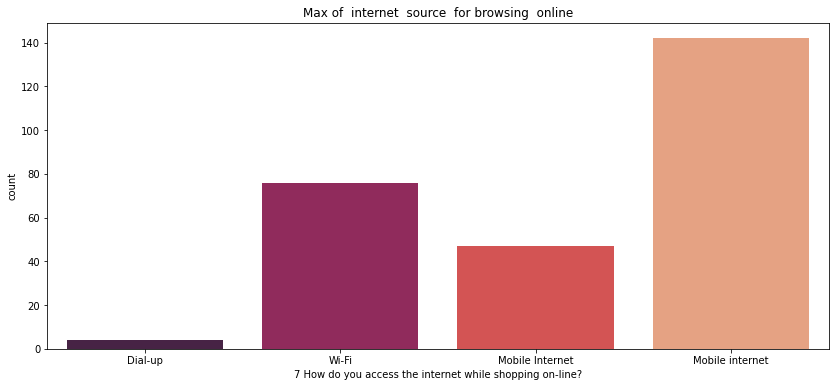

In [87]:
plt.figure(figsize=(14,6))
sns.countplot(df['7 How do you access the internet while shopping on-line?'], palette="rocket");
plt.title('Max of  internet  source  for browsing  online')

peoples prefers shopping through mobile internet more than any other medium

# 7. From where the Internet is being used the most

In [88]:
df['8 Which device do you use to access the online shopping?'].value_counts()

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64

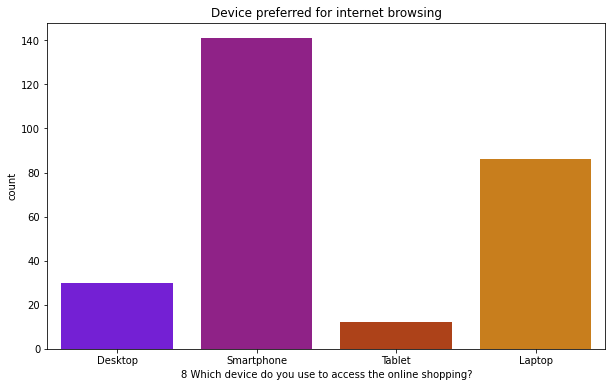

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(df['8 Which device do you use to access the online shopping?'], palette="gnuplot")
plt.title('Device preferred for internet browsing');

Its obvious that people preferred to use smartphone more as data consumption through mobile is more .

# 8. Analysis based on screen size

In [97]:
df['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '].value_counts()

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: 9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        , dtype: int64

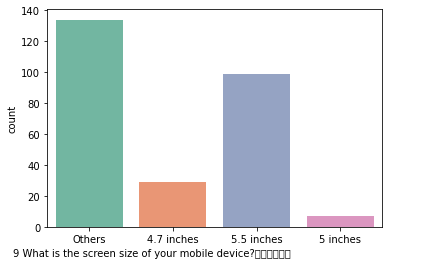

In [100]:
sns.countplot(df['9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '], palette="Set2");

# 9. operating system

In [101]:
df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '].value_counts()

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64

window mobile operator is more than others .

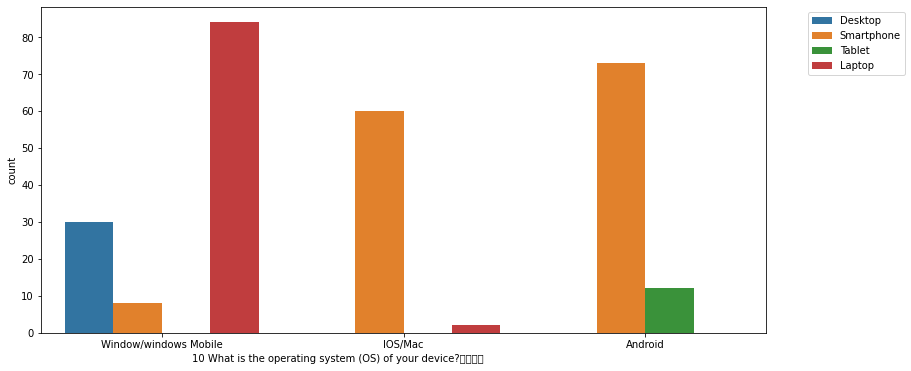

In [104]:
plt.figure(figsize=(13,6))
sns.countplot(df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '],hue =df['8 Which device do you use to access the online shopping?'])
plt.legend(bbox_to_anchor=(1.05, 1))

Observations:

1.  we can observe  that in windows  we have more  laptop users and desktop users 
2. in mac/os  we  have max of smartphone  users and very low of laptop users 
3. In android  we  have more  of smartphone  users  then we  have tablets users

# 10.Browser used for shopping

In [105]:
df[       '11 What browser do you run on your device to access the website?\t\t\t                                                          '].value_counts()

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64

mostly people used google chrome and then safari to brouse.

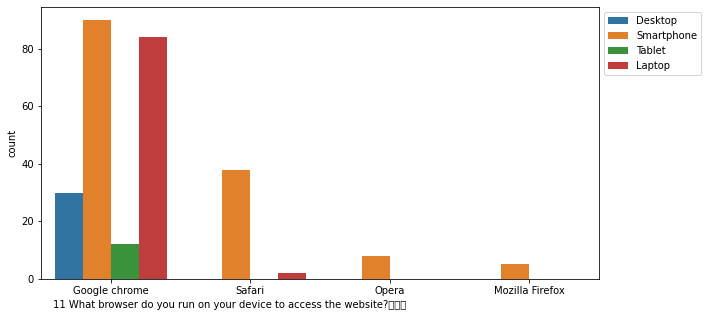

In [112]:
plt.figure(figsize=(10,5))
sns.countplot(df[       '11 What browser do you run on your device to access the website?\t\t\t                                                          '],
              hue=df['8 Which device do you use to access the online shopping?'])
plt.legend(bbox_to_anchor=(1,1))

overall we can say that Google chrome is widely used in all devices

# 11. Which channel the consumer prefer the most ?

In [118]:
df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   '].value_counts()   

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , dtype: int64

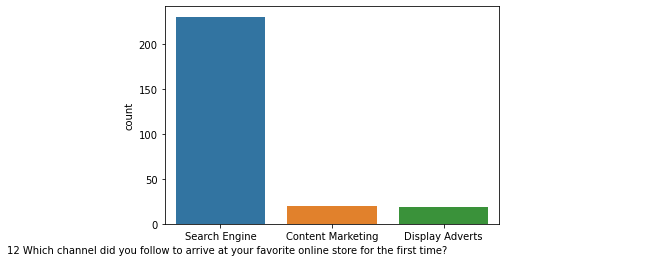

In [120]:
sns.countplot(df['12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ']);

people prefers search engine for online shopping for first time

# 12. After visiting for the 1st time how they visit the online retail store

In [121]:
df['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '].value_counts()

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: 13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   , dtype: int64

Text(0.5, 1.0, 'Consumers retention for visiting the Online store ')

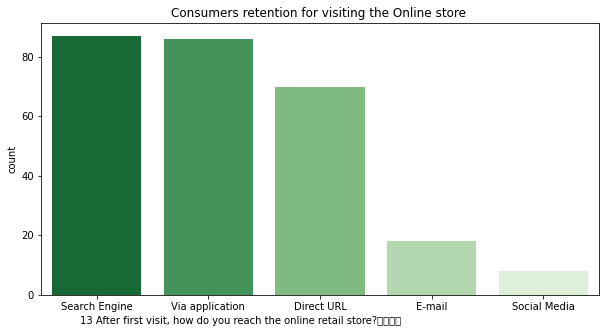

In [123]:
plt.figure(figsize=(10,5))
sns.countplot(df[       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '
], palette="Greens_r")
plt.title('Consumers retention for visiting the Online store ')

# 13. How much a consumer take time to purchase something in e-retail store

In [124]:
df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '].value_counts()

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , dtype: int64

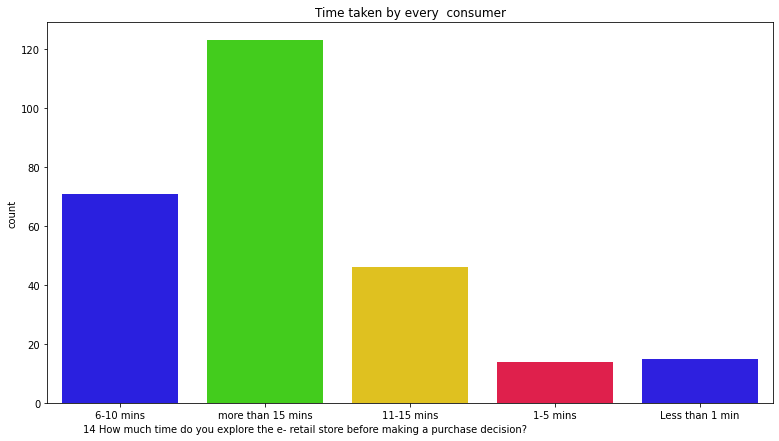

In [126]:
plt.figure(figsize=(13,7))
sns.countplot(df[       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '
], palette ='prism')
plt.title('Time taken by every  consumer');

So as we can see that the max people before buying something in any retail store takes around 15 mins and  followed by 6-10 mins and very few people are there who takes less then 1 min of time.

# 14. consumer preference

In [128]:
df[       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               '
].value_counts()

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: int64

people prefers credit and debit card which shows internet penetration and digital revolution

# 15. customer choice

In [131]:
df[       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '
].value_counts()

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: 16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   , dtype: int64

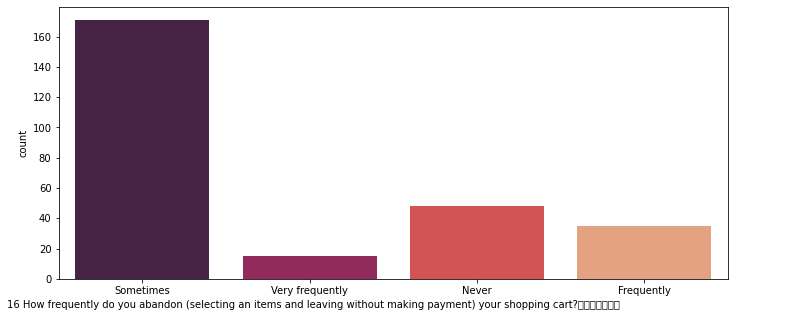

In [133]:
plt.figure(figsize=(12,5))
sns.countplot(df[       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '
],palette ='rocket');

# 16. Reason for not purchasing

In [135]:
df[       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '
].value_counts()

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64

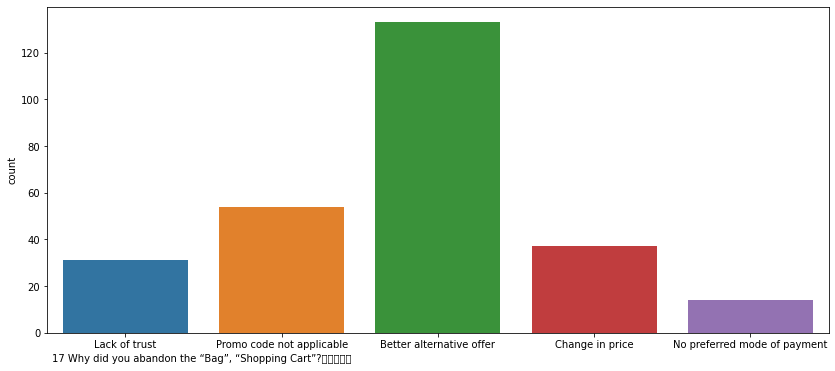

In [137]:
plt.figure(figsize=(14,6))
sns.countplot(df[       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '
]);

promo code play a key role for purchasing also.

# 17. customer opinion

In [138]:
df[       '18 The content on the website must be easy to read and understand'
].value_counts()

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: 18 The content on the website must be easy to read and understand, dtype: int64

<AxesSubplot:xlabel='18 The content on the website must be easy to read and understand', ylabel='count'>

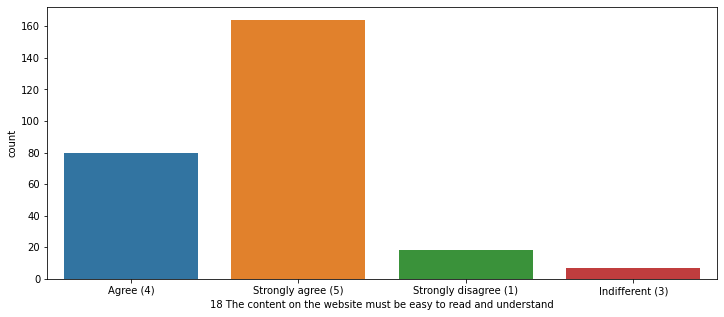

In [140]:
plt.figure(figsize=(12,5))
sns.countplot(df[       '18 The content on the website must be easy to read and understand'
])

# 18. comaprsion with other product

In [141]:
df[       '19 Information on similar product to the one highlighted  is important for product comparison'
].value_counts()

Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: int64

<AxesSubplot:xlabel='19 Information on similar product to the one highlighted  is important for product comparison', ylabel='count'>

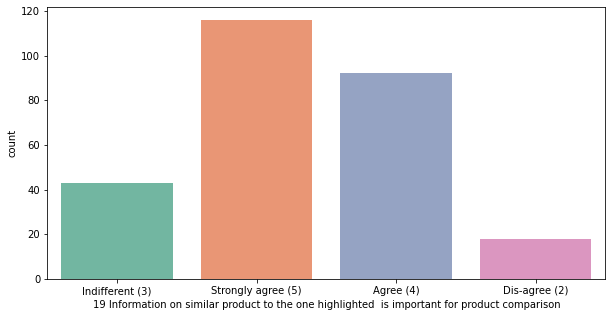

In [142]:
plt.figure(figsize=(10,5))
sns.countplot(df[       '19 Information on similar product to the one highlighted  is important for product comparison'
], palette ='Set2')

# 19. Availabilty of information

In [143]:
df[       '20 Complete information on listed seller and product being offered is important for purchase decision.'
].value_counts()

Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64

<AxesSubplot:xlabel='20 Complete information on listed seller and product being offered is important for purchase decision.', ylabel='count'>

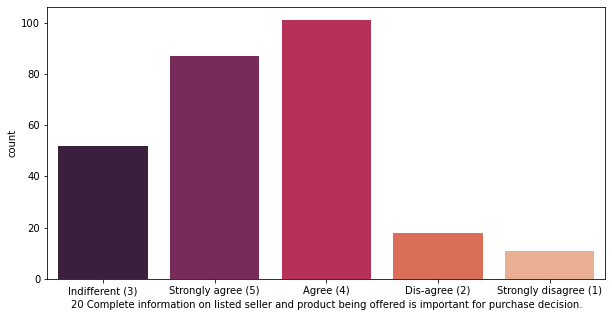

In [145]:
plt.figure(figsize=(10,5))
sns.countplot(df[       '20 Complete information on listed seller and product being offered is important for purchase decision.'
],palette ='rocket')

# 20. relevant information

In [146]:
df[       '21 All relevant information on listed products must be stated clearly'
].value_counts()

Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: 21 All relevant information on listed products must be stated clearly, dtype: int64

<AxesSubplot:xlabel='21 All relevant information on listed products must be stated clearly', ylabel='count'>

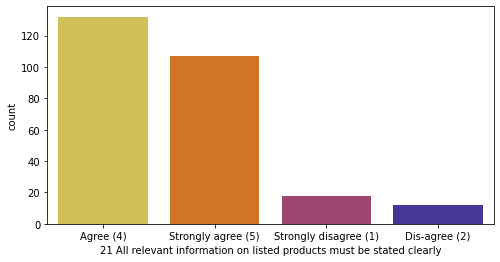

In [150]:
plt.figure(figsize=(8,4))
sns.countplot(df[       '21 All relevant information on listed products must be stated clearly'
], palette ='CMRmap_r')

# 21. user friendly navigation system

In [151]:
df['22 Ease of navigation in website'].value_counts()

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: 22 Ease of navigation in website, dtype: int64

<AxesSubplot:xlabel='22 Ease of navigation in website', ylabel='count'>

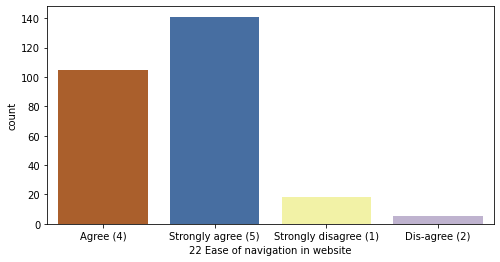

In [154]:
plt.figure(figsize=(8,4))
sns.countplot(df['22 Ease of navigation in website'], palette='Accent_r')

# 22. Loading and processing speed

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Strongly disagree (1)     12
Indifferent (3)           12
Name: 23 Loading and processing speed, dtype: int64


<AxesSubplot:xlabel='23 Loading and processing speed', ylabel='count'>

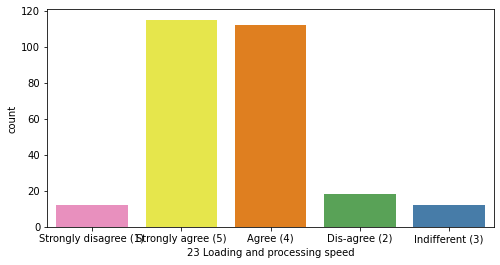

In [156]:
print(df[ '23 Loading and processing speed'].value_counts())
plt.figure(figsize=(8,4))
sns.countplot(df[ '23 Loading and processing speed'], palette ='Set1_r')

# 23. Interface easyness

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: 24 User friendly Interface of the website, dtype: int64


<AxesSubplot:xlabel='24 User friendly Interface of the website', ylabel='count'>

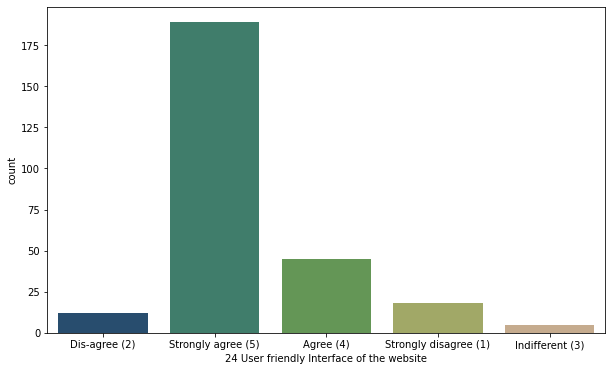

In [157]:
print(df[       '24 User friendly Interface of the website'
].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(df[       '24 User friendly Interface of the website'
], palette ='gist_earth')

investing in good interface for any website is fruitful 

# 24.payment method

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: 25 Convenient Payment methods, dtype: int64


<AxesSubplot:xlabel='25 Convenient Payment methods', ylabel='count'>

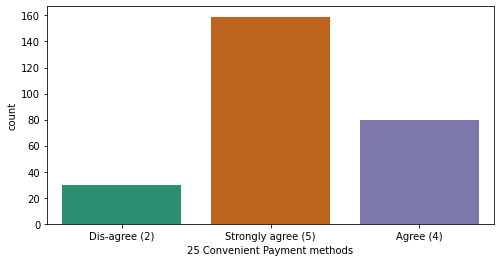

In [159]:
print(df[       '25 Convenient Payment methods'
].value_counts())

plt.figure(figsize=(8,4))
sns.countplot(df[       '25 Convenient Payment methods'
], palette ='Dark2')

# 25. Trust

In [160]:
df[       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'
].value_counts()

Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64

# 26. Empathy

In [162]:
df[       '27 Empathy (readiness to assist with queries) towards the customers'
].value_counts()

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64

# 27.privacy issue

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64


<AxesSubplot:xlabel='28 Being able to guarantee the privacy of the customer', ylabel='count'>

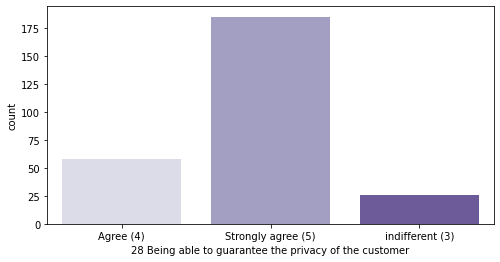

In [163]:
print(df[       '28 Being able to guarantee the privacy of the customer'
].value_counts())

plt.figure(figsize=(8,4))
sns.countplot(df[       '28 Being able to guarantee the privacy of the customer'
], palette ='Purples')

In [164]:
df['28 Being able to guarantee the privacy of the customer'].value_counts()

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64

# 28. Responsiveness

In [165]:
df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].value_counts()

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64

<AxesSubplot:xlabel='29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)', ylabel='count'>

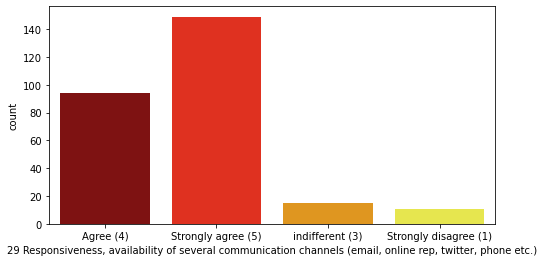

In [168]:
plt.figure(figsize=(8,4),facecolor='white')
sns.countplot(df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'], palette="hot") 

In [169]:
df['30 Online shopping gives monetary benefit and discounts'].value_counts()

Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: 30 Online shopping gives monetary benefit and discounts, dtype: int64

In [170]:
df['31 Enjoyment is derived from shopping online'].value_counts()

Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: 31 Enjoyment is derived from shopping online, dtype: int64

In [171]:
df['32 Shopping online is convenient and flexible'].value_counts()

Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: 32 Shopping online is convenient and flexible, dtype: int64

MAXIMUM PEOPLE AGREE THAT SHOPPING ONLINE IS CONVENIENT AND FLEXIBLE

# 29.RETURN FLEXIBILTY

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64


<AxesSubplot:xlabel='33 Return and replacement policy of the e-tailer is important for purchase decision', ylabel='count'>

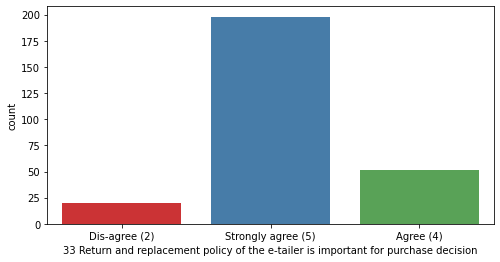

In [172]:
print(df['33 Return and replacement policy of the e-tailer is important for purchase decision'].value_counts())

plt.figure(figsize=(8,4),facecolor='white')
sns.countplot(df['33 Return and replacement policy of the e-tailer is important for purchase decision'], palette="Set1") 

Replacement works in favours of sells so sellers has to be positive in this area

# 30. Loyality programme

In [173]:
df['34 Gaining access to loyalty programs is a benefit of shopping online'].value_counts()

Strongly agree (5)       115
Agree (4)                 64
indifferent (3)           64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, dtype: int64

<AxesSubplot:xlabel='34 Gaining access to loyalty programs is a benefit of shopping online', ylabel='count'>

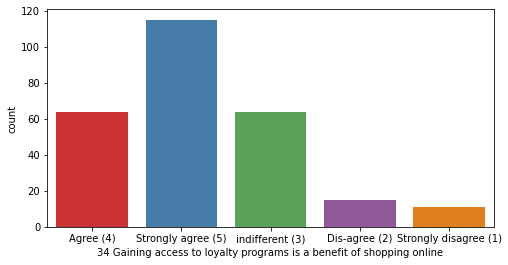

In [174]:
plt.figure(figsize=(8,4),facecolor='white')
sns.countplot(df['34 Gaining access to loyalty programs is a benefit of shopping online'], palette="Set1") 

In [175]:
df['35 Displaying quality Information on the website improves satisfaction of customers'].value_counts()

Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: 35 Displaying quality Information on the website improves satisfaction of customers, dtype: int64

# 31. Website location

In [176]:
df['36 User derive satisfaction while shopping on a good quality website or application'].value_counts()

Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: 36 User derive satisfaction while shopping on a good quality website or application, dtype: int64

<AxesSubplot:xlabel='36 User derive satisfaction while shopping on a good quality website or application', ylabel='count'>

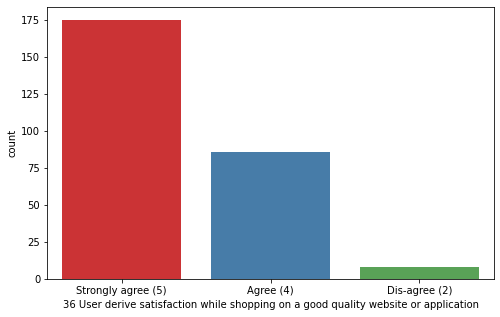

In [178]:
plt.figure(figsize=(8,5))
sns.countplot(df['36 User derive satisfaction while shopping on a good quality website or application'], palette="Set1")

In [179]:
df['37 Net Benefit derived from shopping online can lead to users satisfaction'].value_counts()

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64

# 32 Trust

In [180]:
df['38 User satisfaction cannot exist without trust'].value_counts()

Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: 38 User satisfaction cannot exist without trust, dtype: int64

<AxesSubplot:xlabel='38 User satisfaction cannot exist without trust', ylabel='count'>

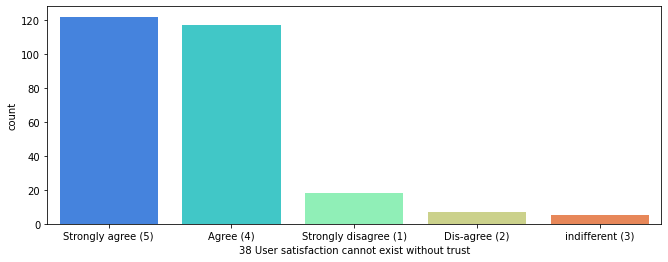

In [181]:
plt.figure(figsize=(11,4),facecolor='white')
sns.countplot(df['38 User satisfaction cannot exist without trust'], palette="rainbow") 

Trust is most important factor for market progress

In [182]:
df['39 Offering a wide variety of listed product in several category'].value_counts()

Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: 39 Offering a wide variety of listed product in several category, dtype: int64

In [183]:
df['40 Provision of complete and relevant product information'].value_counts()

Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: 40 Provision of complete and relevant product information, dtype: int64

In [184]:
df['41 Monetary savings'].value_counts()

Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: 41 Monetary savings, dtype: int64

<AxesSubplot:xlabel='42 The Convenience of patronizing the online retailer', ylabel='count'>

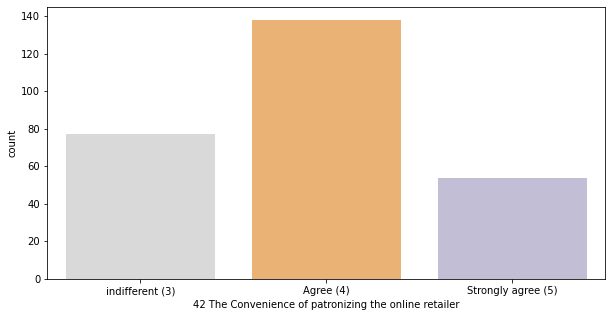

In [186]:
plt.figure(figsize=(10,5))
sns.countplot(df['42 The Convenience of patronizing the online retailer'], palette="Set3_r") 

# 33. sense of adventure

In [187]:
df['43 Shopping on the website gives you the sense of adventure'].value_counts()

Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: 43 Shopping on the website gives you the sense of adventure, dtype: int64

<AxesSubplot:xlabel='43 Shopping on the website gives you the sense of adventure', ylabel='count'>

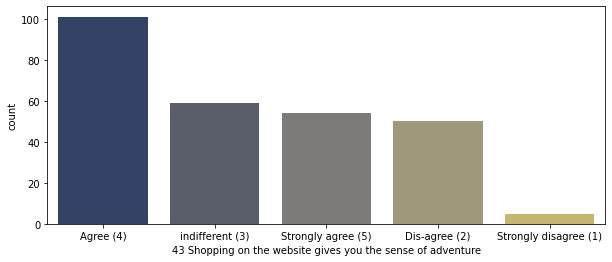

In [189]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(df['43 Shopping on the website gives you the sense of adventure'], palette="cividis") 

shopping online is like a fun for customer which enhances sell.

In [190]:
df['44 Shopping on your preferred e-tailer enhances your social status'].value_counts()

indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: 44 Shopping on your preferred e-tailer enhances your social status, dtype: int64

# 34. Satisfaction level

Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: 47 Getting value for money spent, dtype: int64


<AxesSubplot:xlabel='47 Getting value for money spent', ylabel='count'>

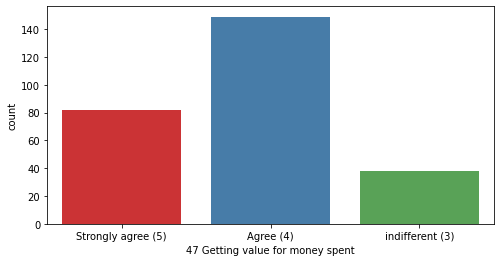

In [192]:
print(df['47 Getting value for money spent'].value_counts())

plt.figure(figsize=(8,4))
sns.countplot(df['47 Getting value for money spent'], palette="Set1") 

# Importance of feedback from consumer

In [193]:
df[       'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '
].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: int64

<AxesSubplot:xlabel='From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ', ylabel='count'>

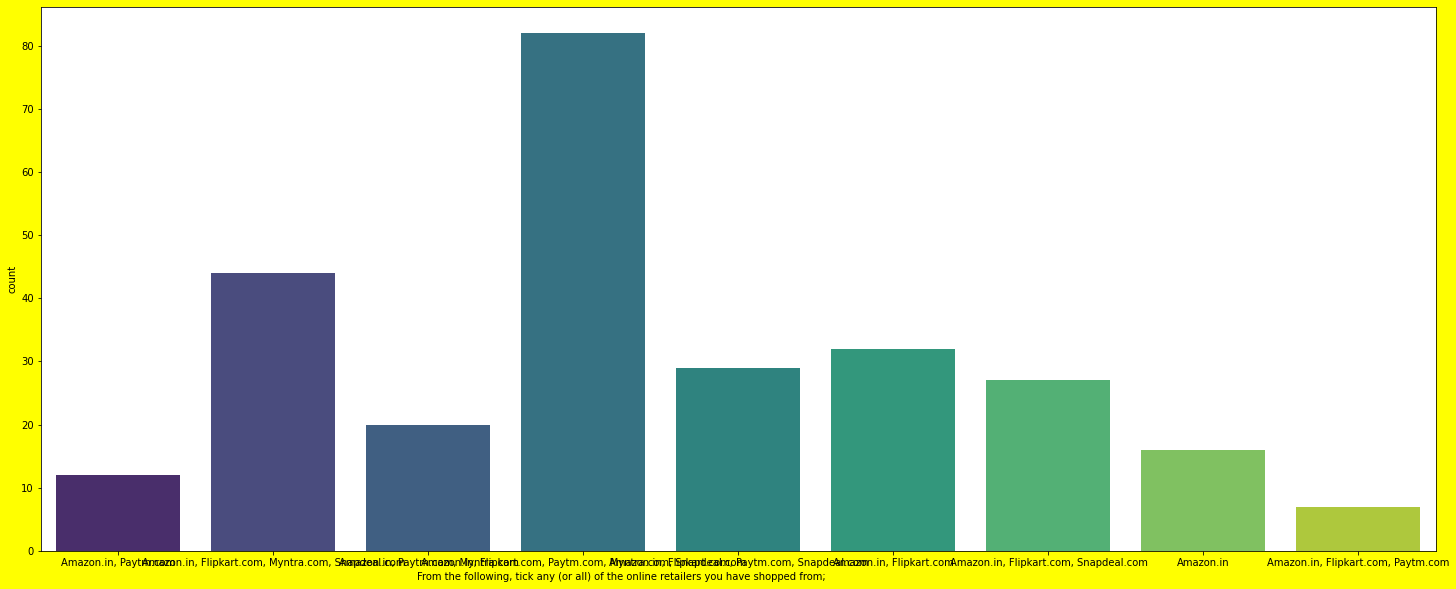

In [194]:
plt.figure(figsize=(25,10),facecolor='yellow')
sns.countplot(df[       'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '
], palette="viridis") 

we can see that the Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com has the max people shop online 

In [195]:
df['Easy to use website or application'].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64

<AxesSubplot:xlabel='Easy to use website or application', ylabel='count'>

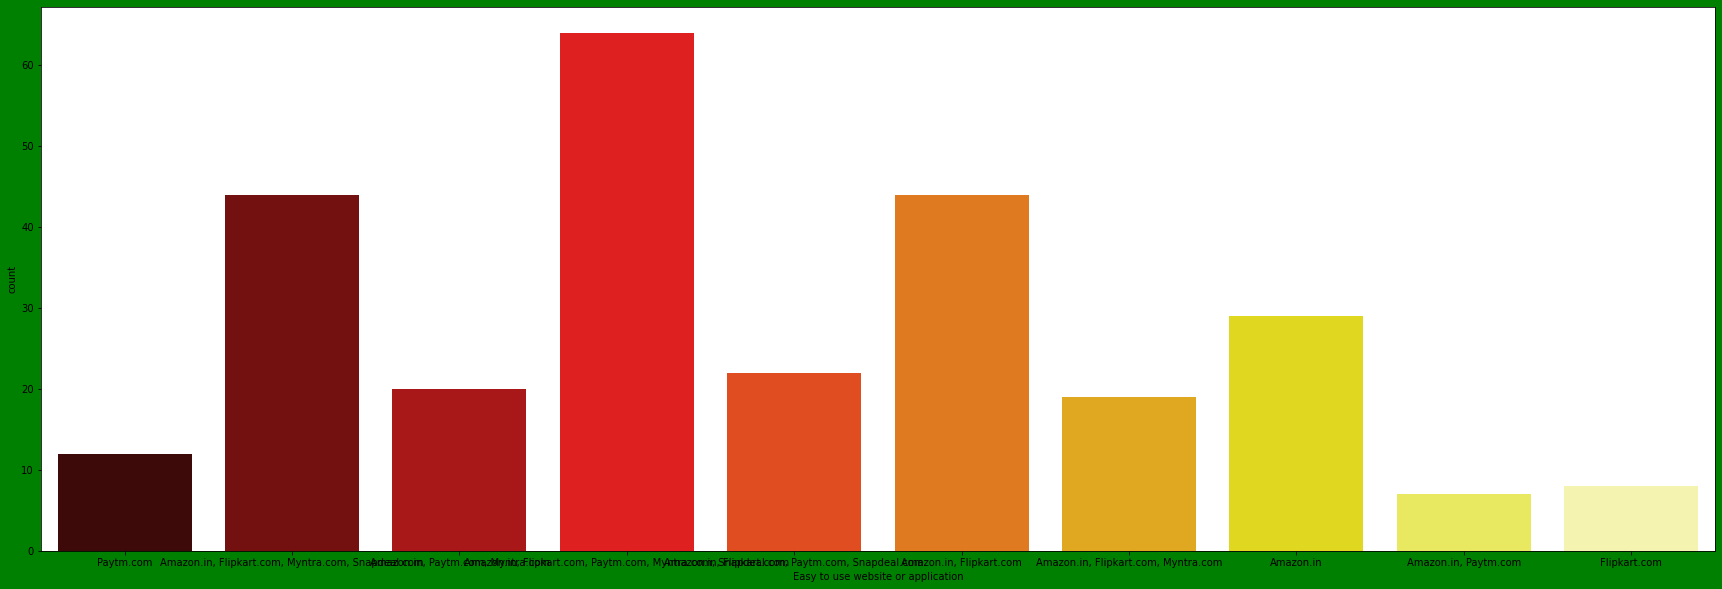

In [198]:
plt.figure(figsize=(30,10),facecolor='green')
sns.countplot(df['Easy to use website or application'], palette="hot") 

paytm is the most ease for people to operate

In [199]:
df['Visual appealing web-page layout'].value_counts()

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64

<AxesSubplot:xlabel='Visual appealing web-page layout', ylabel='count'>

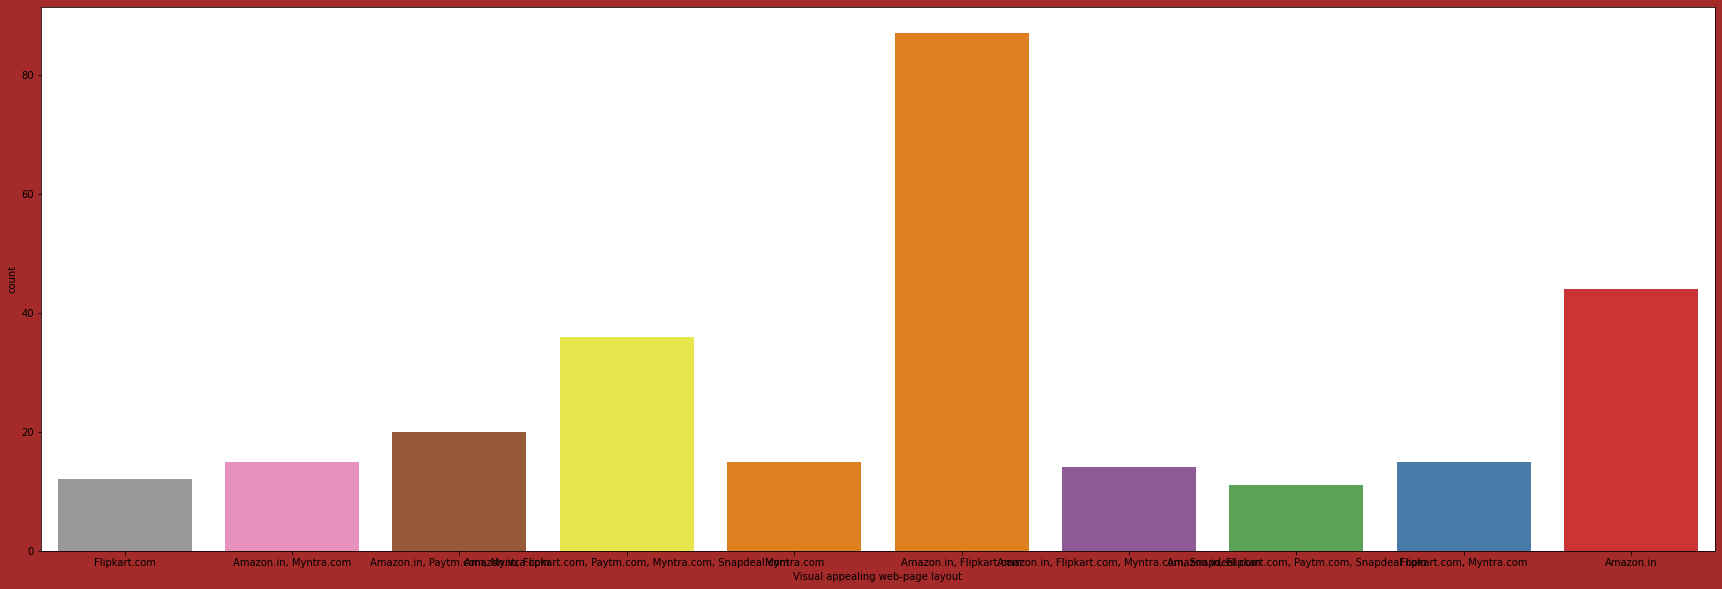

In [201]:
plt.figure(figsize=(30,10),facecolor='brown')
sns.countplot(df['Visual appealing web-page layout'], palette="Set1_r") 

visual appealing matters for selling or attracting customer

In [202]:
df['Wild variety of product on offer'].value_counts()

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64

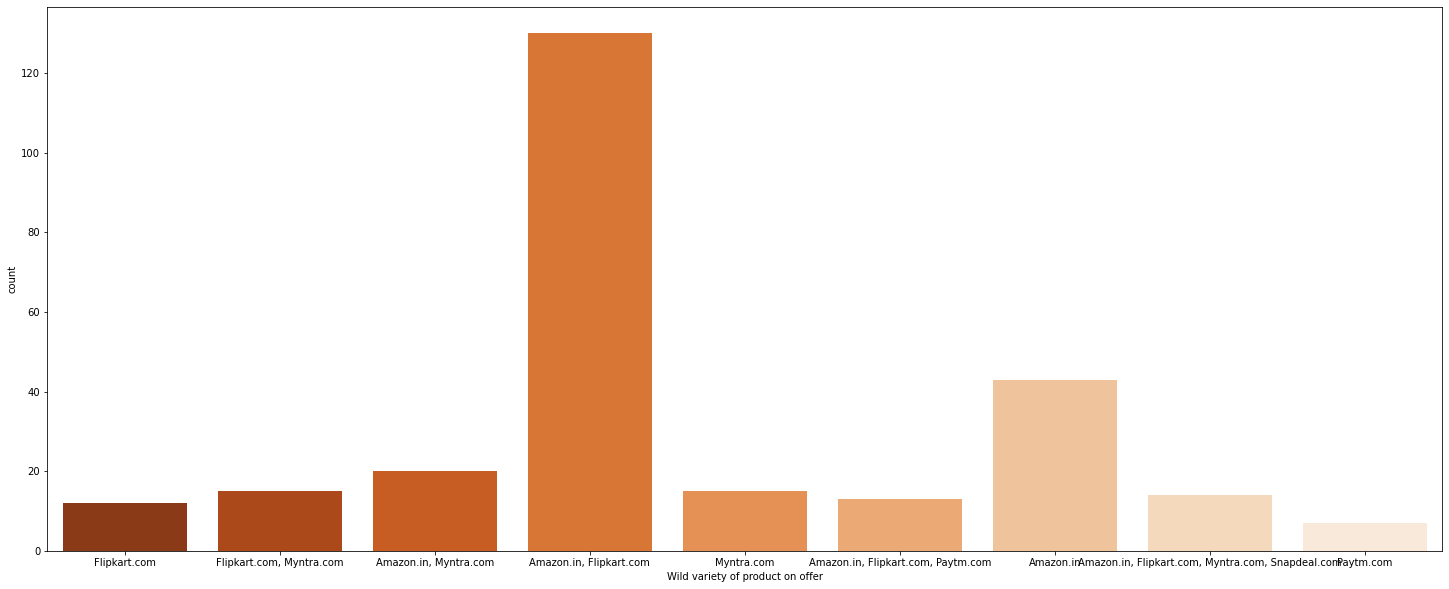

In [204]:
plt.figure(figsize=(25,10),facecolor='white')
sns.countplot(df['Wild variety of product on offer'], palette='Oranges_r'); 

wild offer works for amazon and flipkart as sells increases due to this

In [205]:
df['Complete, relevant description information of products'].value_counts()

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64

<AxesSubplot:xlabel='Complete, relevant description information of products', ylabel='count'>

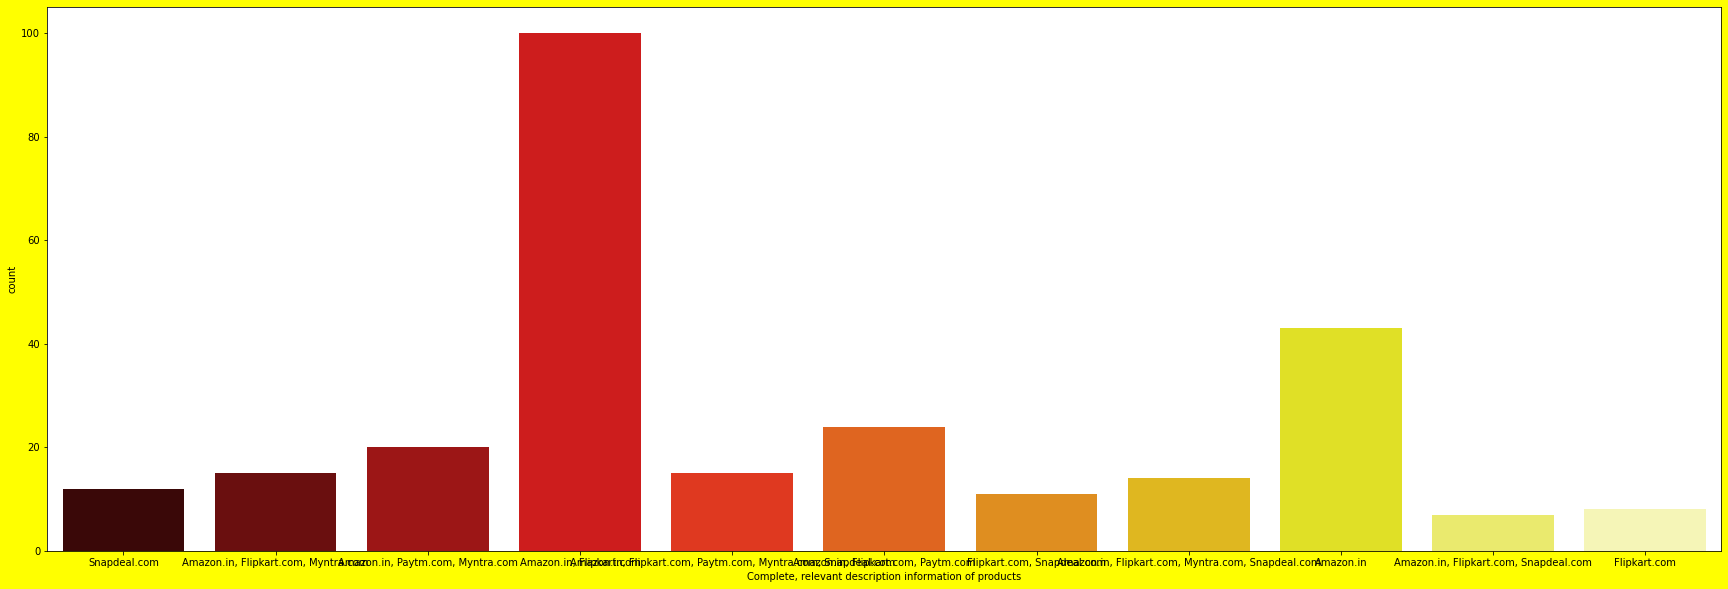

In [206]:
plt.figure(figsize=(30,10),facecolor='yellow')
sns.countplot(df['Complete, relevant description information of products'], palette="hot") 

In [207]:
df['Fast loading website speed of website and application'].value_counts()

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast loading website speed of website and application, dtype: int64

In [208]:
df['Quickness to complete purchase'].value_counts()

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64

In [209]:
df['Availability of several payment options'].value_counts()

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Availability of several payment options, dtype: int64

<AxesSubplot:xlabel='Availability of several payment options', ylabel='count'>

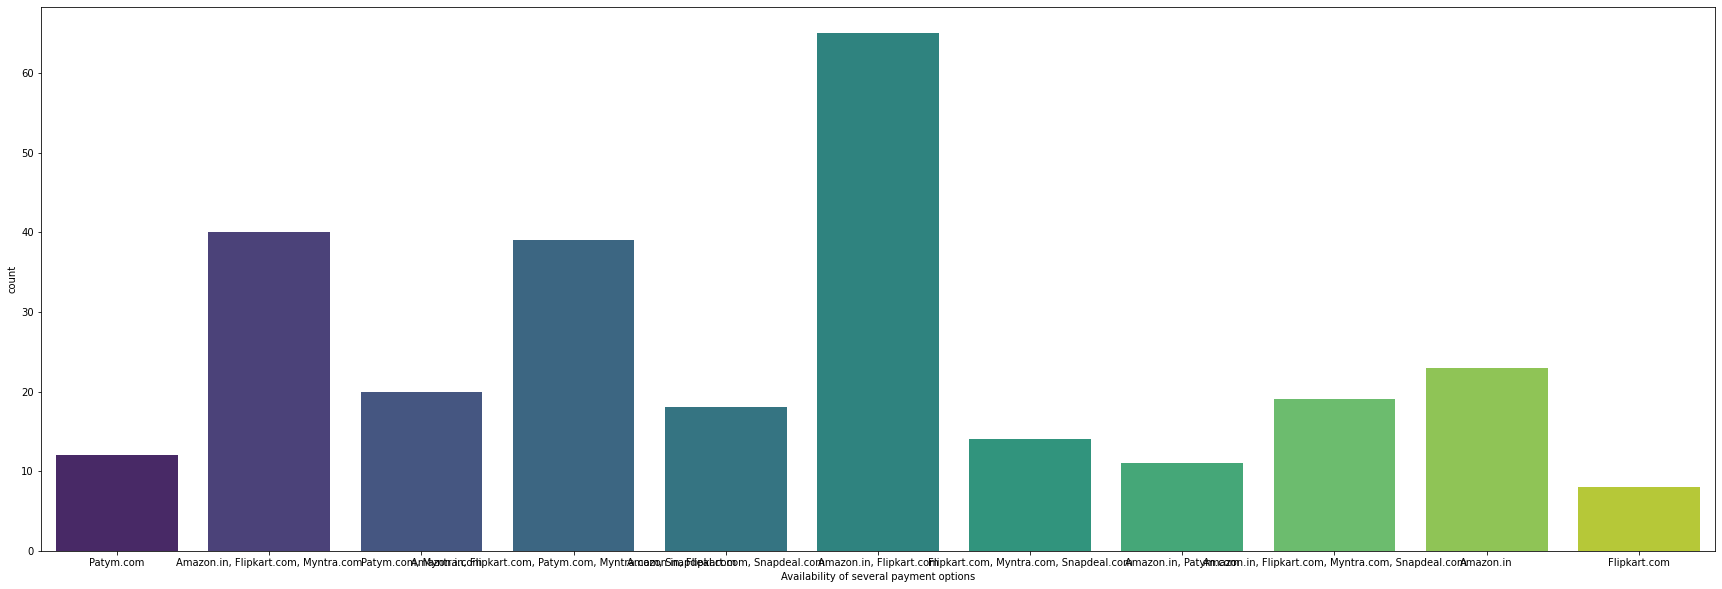

In [215]:
plt.figure(figsize=(30,10),facecolor='white')
sns.countplot(df['Availability of several payment options'], palette="viridis")

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery , dtype: int64


<AxesSubplot:xlabel='Speedy order delivery ', ylabel='count'>

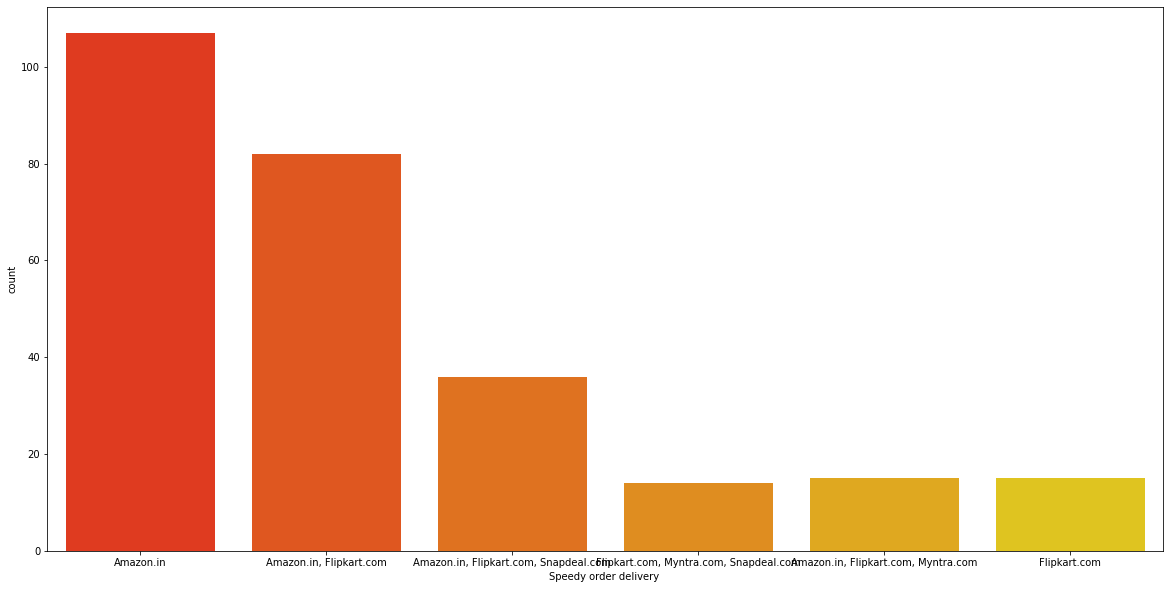

In [217]:
print(df['Speedy order delivery '].value_counts())

plt.figure(figsize=(20,10),facecolor='white')
sns.countplot(df['Speedy order delivery '], palette="autumn") 

amazon leads in delivery faster to customer

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customers’ information, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Myntra.com'),
  Text(2, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Paytm.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(5, 0, 'Paytm.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(9, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(10, 0, 'Flipkart.com')])

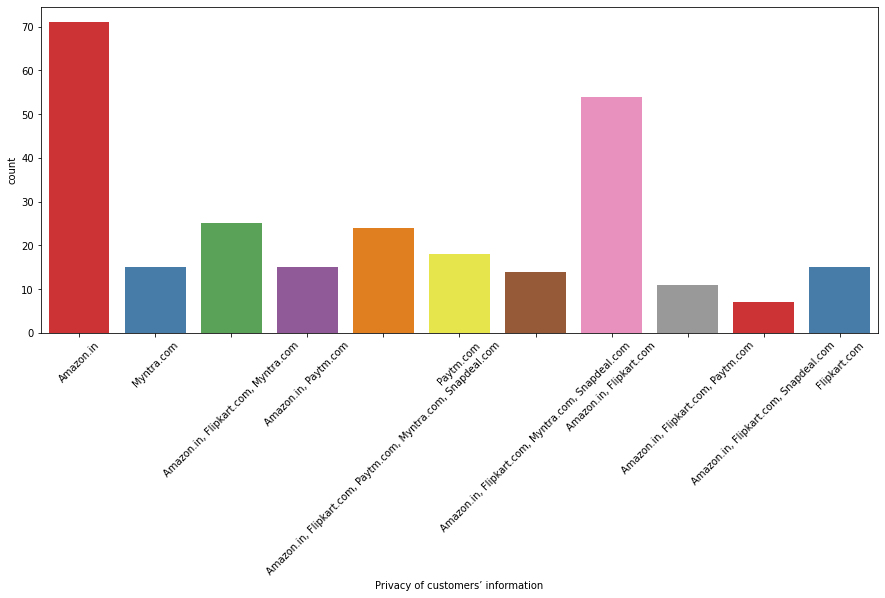

In [242]:
print(df['Privacy of customers’ information'].value_counts())

plt.figure(figsize=(15,6),facecolor='white')
sns.countplot(df['Privacy of customers’ information'], palette="Set1") 
plt.xticks(rotation=45)

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(4, 0, 'Paytm.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(6, 0, 'Flipkart.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(8, 0, 'Amazon.in, Flipkart.com'),
  Text(9, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(10, 0, 'Amazon.in, Snapdeal.com')])

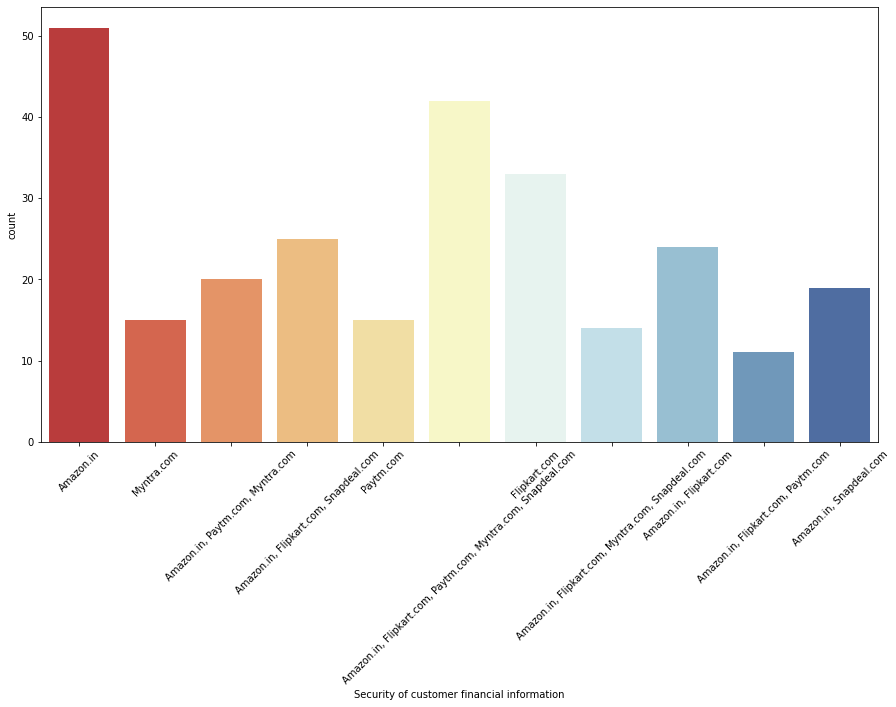

In [241]:
print(df['Security of customer financial information'].value_counts())

plt.figure(figsize=(15,8),facecolor='white')
sns.countplot(df['Security of customer financial information'], palette='RdYlBu')
plt.xticks(rotation=45)

In [221]:
df['Presence of online assistance through multi-channel'].value_counts()

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence of online assistance through multi-channel, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(2, 0, 'Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal'),
  Text(4, 0, 'Amazon.in, Myntra.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(6, 0, 'Amazon.in'),
  Text(7, 0, 'Amazon.in, Flipkart.com'),
  Text(8, 0, 'Amazon.in, Snapdeal'),
  Text(9, 0, 'Flipkart.com')])

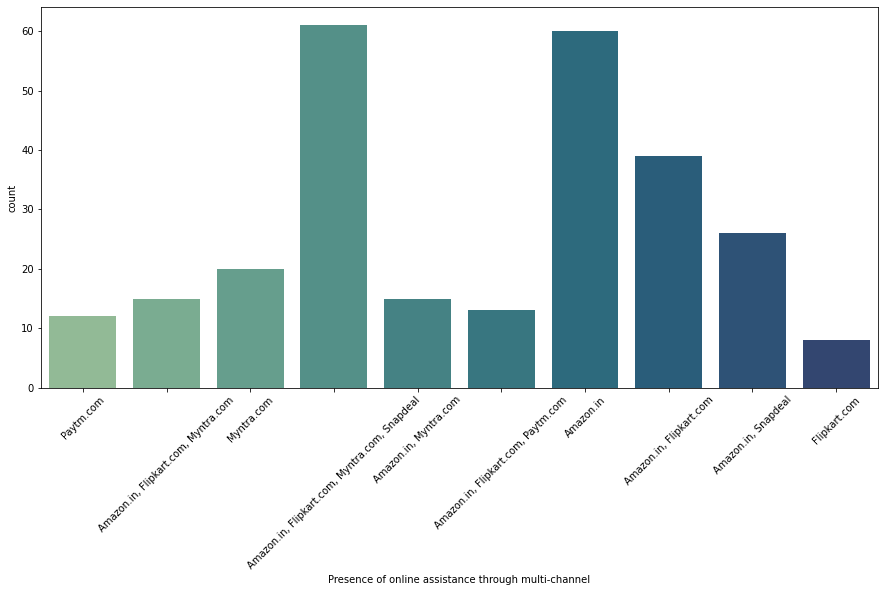

In [240]:
plt.figure(figsize=(15,7),facecolor='white')
sns.countplot(df['Presence of online assistance through multi-channel'], palette="crest") 
plt.xticks(rotation=45)

In [223]:
df['Longer time to get logged in (promotion, sales period)'].value_counts()

Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Amazon.in, Flipkart.com'),
  Text(2, 0, 'Myntra.com'),
  Text(3, 0, 'Snapdeal.com'),
  Text(4, 0, 'Flipkart.com, Paytm.com'),
  Text(5, 0, 'Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Paytm.com'),
  Text(8, 0, 'Amazon.in, Paytm.com'),
  Text(9, 0, 'Flipkart.com')])

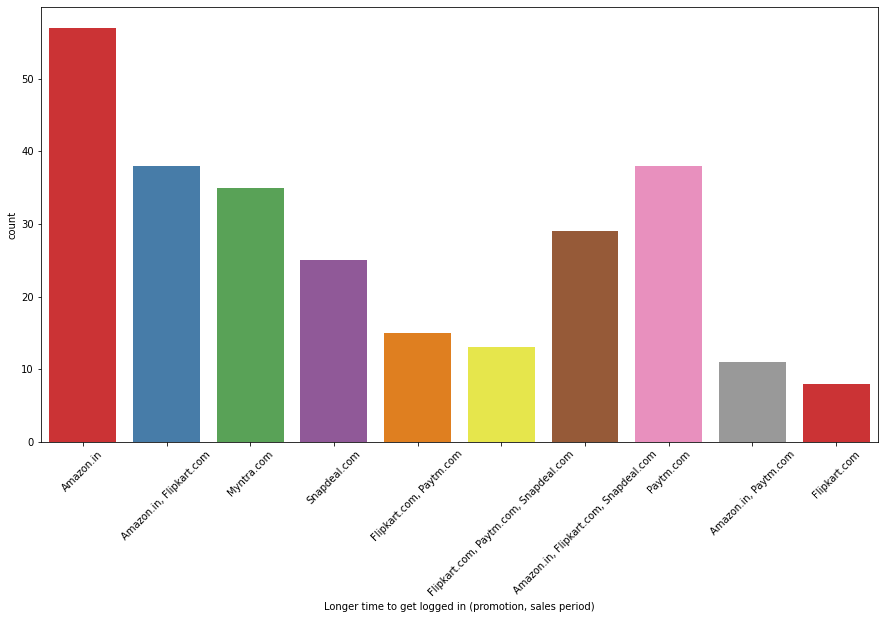

In [239]:
plt.figure(figsize=(15,8),facecolor='white')
sns.countplot(df['Longer time to get logged in (promotion, sales period)'], palette="Set1") 
plt.xticks(rotation=45)

In [225]:
df['Longer time in displaying graphics and photos (promotion, sales period)'].value_counts()

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64

In [226]:
df['Late declaration of price (promotion, sales period)'].value_counts()

Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price (promotion, sales period), dtype: int64

<AxesSubplot:xlabel='Late declaration of price (promotion, sales period)', ylabel='count'>

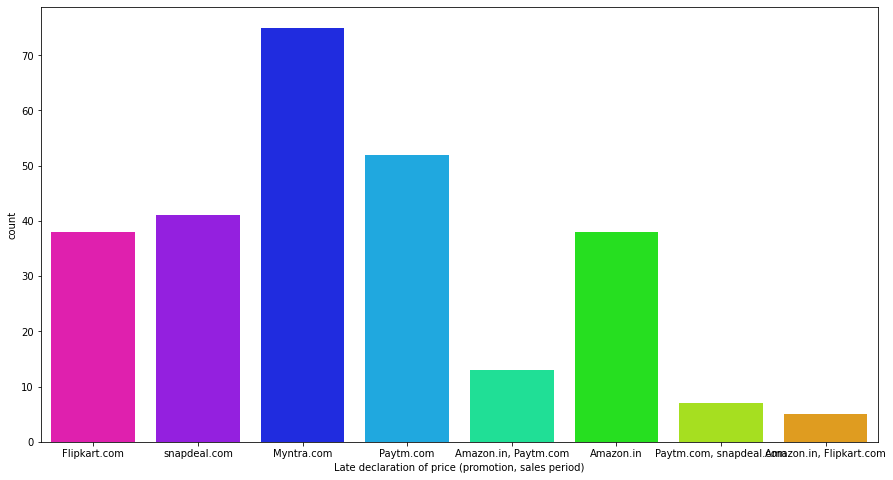

In [238]:
plt.figure(figsize=(15,8),facecolor='white')
sns.countplot(df['Late declaration of price (promotion, sales period)'], palette="hsv_r") 

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time (promotion, sales period), dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Snapdeal.com'),
  Text(2, 0, 'Myntra.com'),
  Text(3, 0, 'Paytm.com'),
  Text(4, 0, 'Amazon.in, Paytm.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Snapdeal.com'),
  Text(7, 0, 'Flipkart.com, Snapdeal.com'),
  Text(8, 0, 'Paytm.com, Snapdeal.com'),
  Text(9, 0, 'Amazon.in'),
  Text(10, 0, 'Amazon.in, Paytm.com, Myntra.com')])

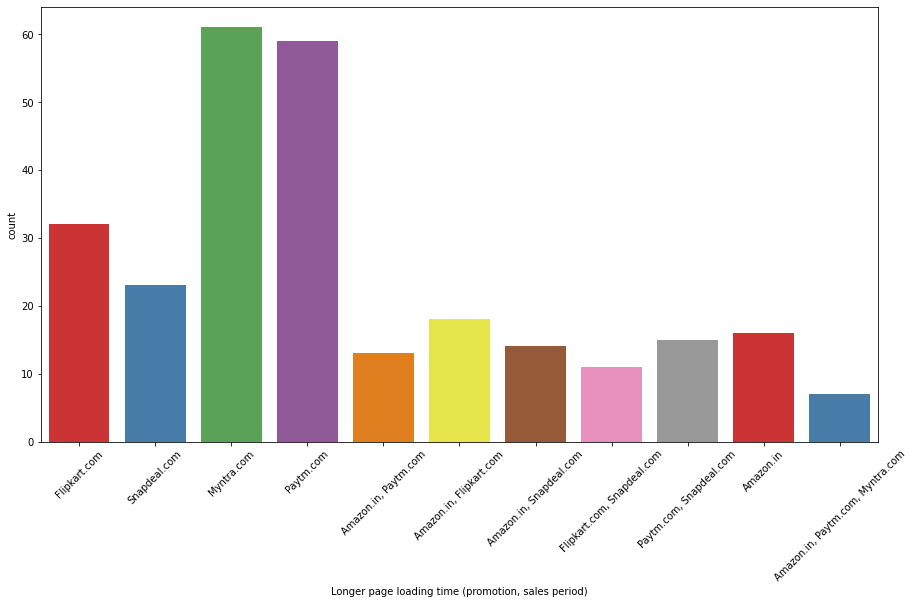

In [237]:
print(df['Longer page loading time (promotion, sales period)'].value_counts())

plt.figure(figsize=(15,8),facecolor='white')
sns.countplot(df['Longer page loading time (promotion, sales period)'], palette="Set1") 
plt.xticks(rotation=45)

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer delivery period, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Paytm.com'),
  Text(1, 0, 'Snapdeal.com'),
  Text(2, 0, 'Flipkart.com'),
  Text(3, 0, 'Amazon.in'),
  Text(4, 0, 'Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Myntra.com')])

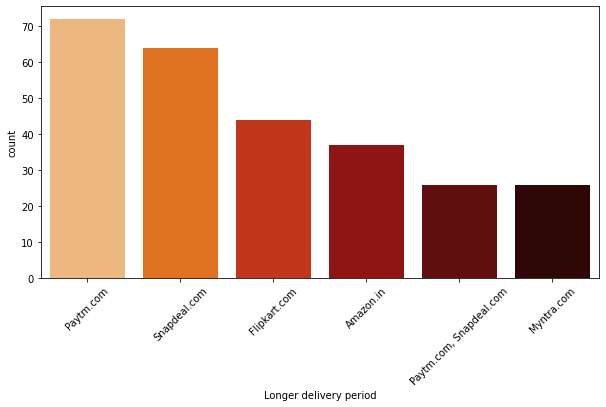

In [236]:
print(df['Longer delivery period'].value_counts())
plt.figure(figsize=(10,5),facecolor='white')
sns.countplot(df['Longer delivery period'], palette='gist_heat_r') 
plt.xticks(rotation=45)

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Amazon.in'),
  Text(2, 0, 'Paytm.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Myntra.com'),
  Text(5, 0, 'Snapdeal.com'),
  Text(6, 0, 'Flipkart.com, Myntra.com')])

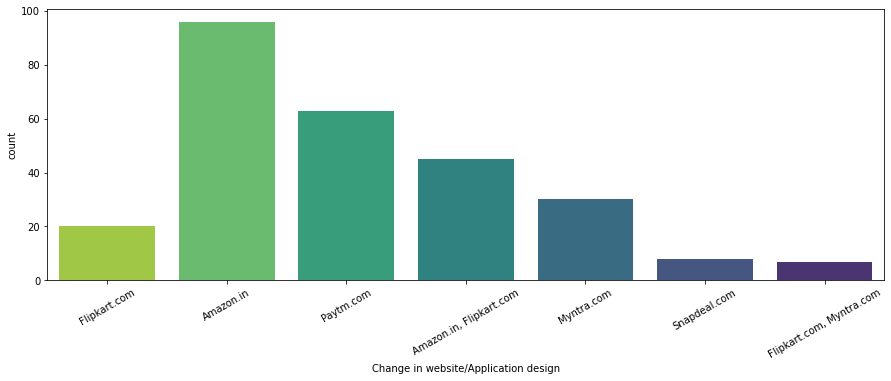

In [244]:
print(df['Change in website/Application design'].value_counts())

plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['Change in website/Application design'], palette='viridis_r') 
plt.xticks(rotation=30)

Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Frequent disruption when moving from one page to another, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Myntra.com'),
  Text(2, 0, 'Paytm.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Snapdeal.com'),
  Text(5, 0, 'Flipkart.com'),
  Text(6, 0, 'Myntra.com, Snapdeal.com'),
  Text(7, 0, 'Flipkart.com, Snapdeal.com')])

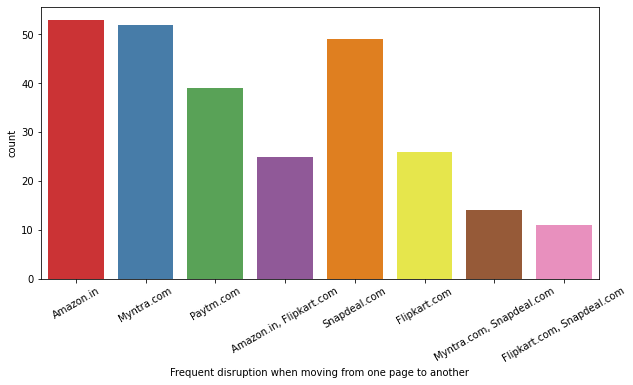

In [247]:
print(df['Frequent disruption when moving from one page to another'].value_counts())

plt.figure(figsize=(10,5),facecolor='white')
sns.countplot(df['Frequent disruption when moving from one page to another'], palette="Set1") 
plt.xticks(rotation=30)

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Amazon.in, Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Amazon.in, Paytm.com'),
  Text(5, 0, 'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com'),
  Text(6, 0, 'Amazon.in'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com')])

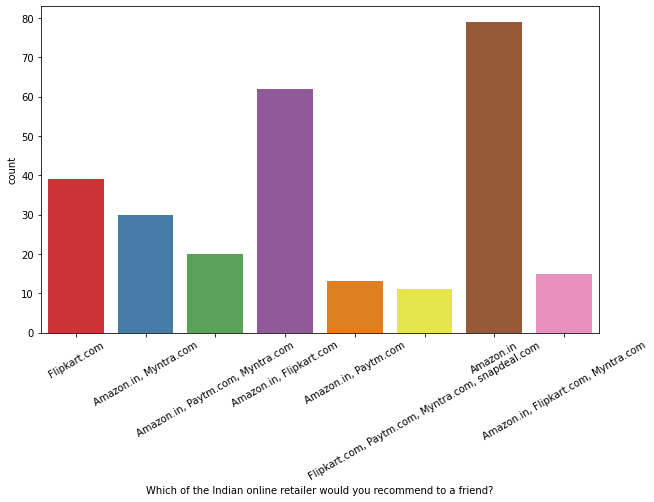

In [250]:
print(df['Which of the Indian online retailer would you recommend to a friend?'].value_counts())

plt.figure(figsize=(10,6),facecolor='white')
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'], palette="Set1") 
plt.xticks(rotation=30)

# Analyzing the Relationship brtweeen customers retention VS Risks inherited

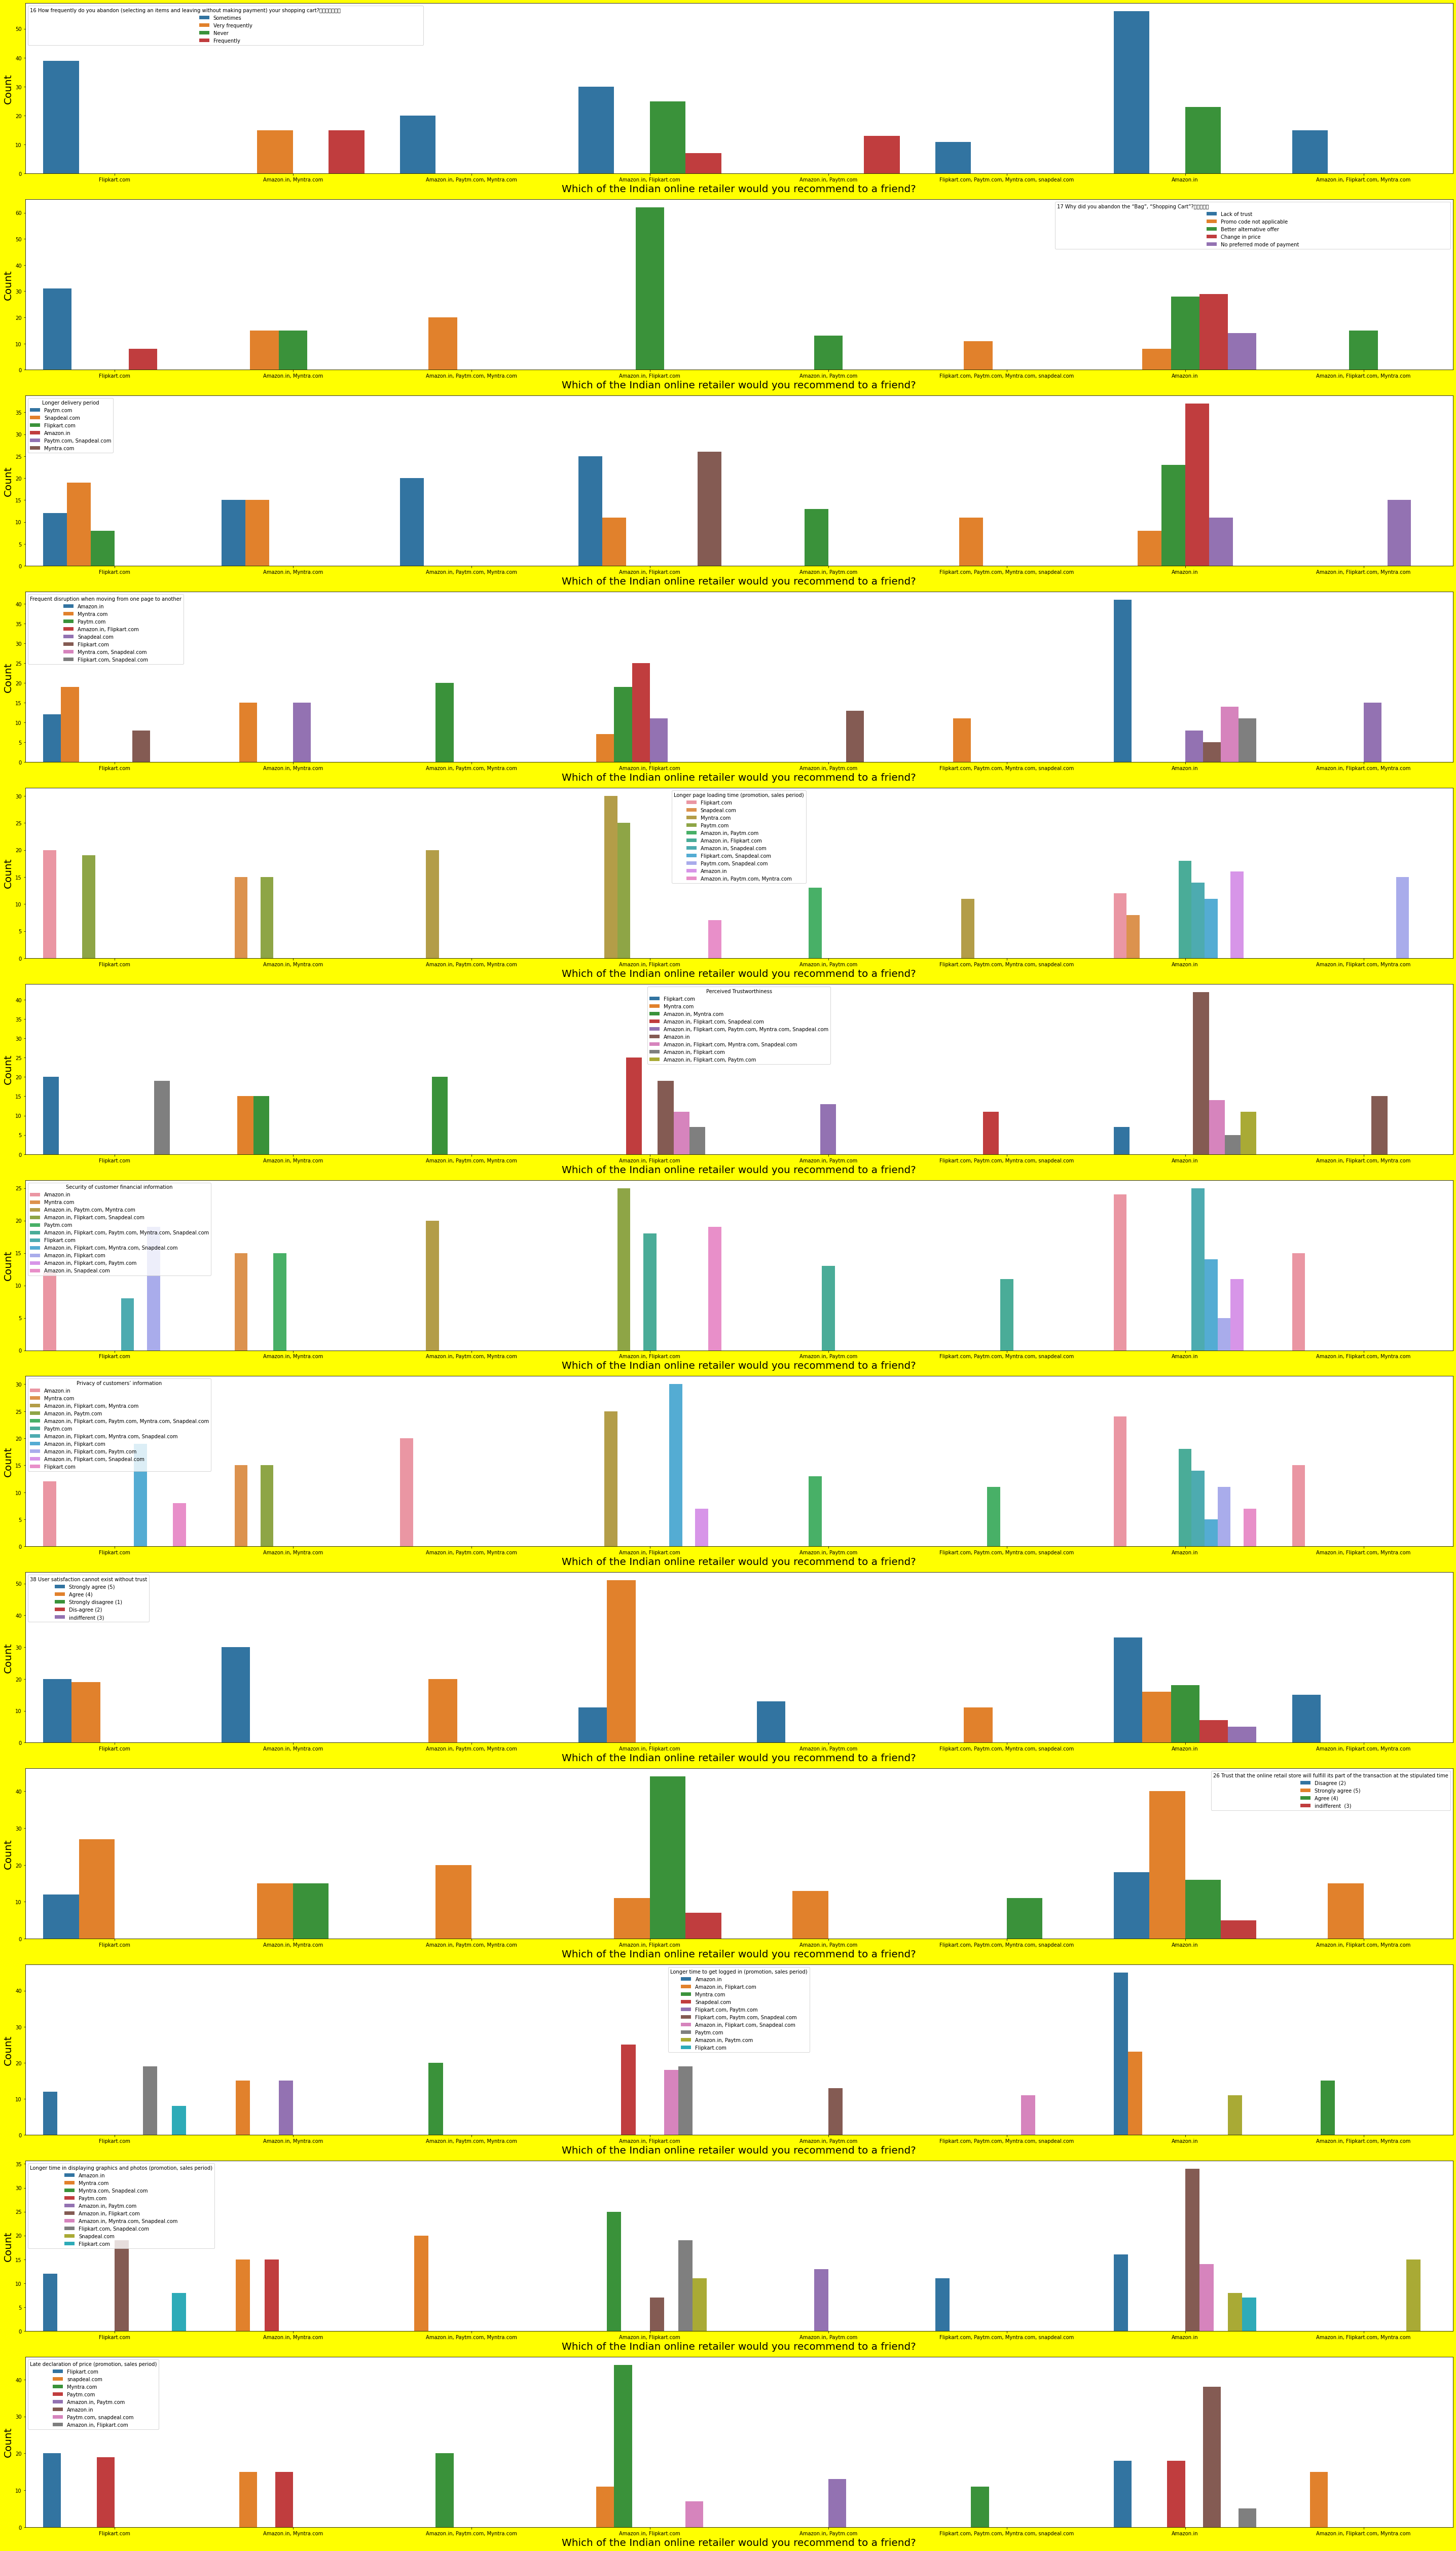

In [254]:
plt.figure(figsize=(40,70),facecolor='yellow')
plotnum=1
y = df[['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ','17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ','Longer delivery period','Frequent disruption when moving from one page to another','Longer page loading time (promotion, sales period)','Perceived Trustworthiness','Security of customer financial information','Privacy of customers’ information','38 User satisfaction cannot exist without trust','26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time','Longer time to get logged in (promotion, sales period)', 'Longer time in displaying graphics and photos (promotion, sales period)','Late declaration of price (promotion, sales period)',]]
X = df['Which of the Indian online retailer would you recommend to a friend?']
for col in y:
    if plotnum<=13:
        plt.subplot(13,1,plotnum)
        sns.countplot(X,hue =y[col])
        plt.xlabel('Which of the Indian online retailer would you recommend to a friend?',fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

# Retaionship between customer retention and diffrent Utilities columns

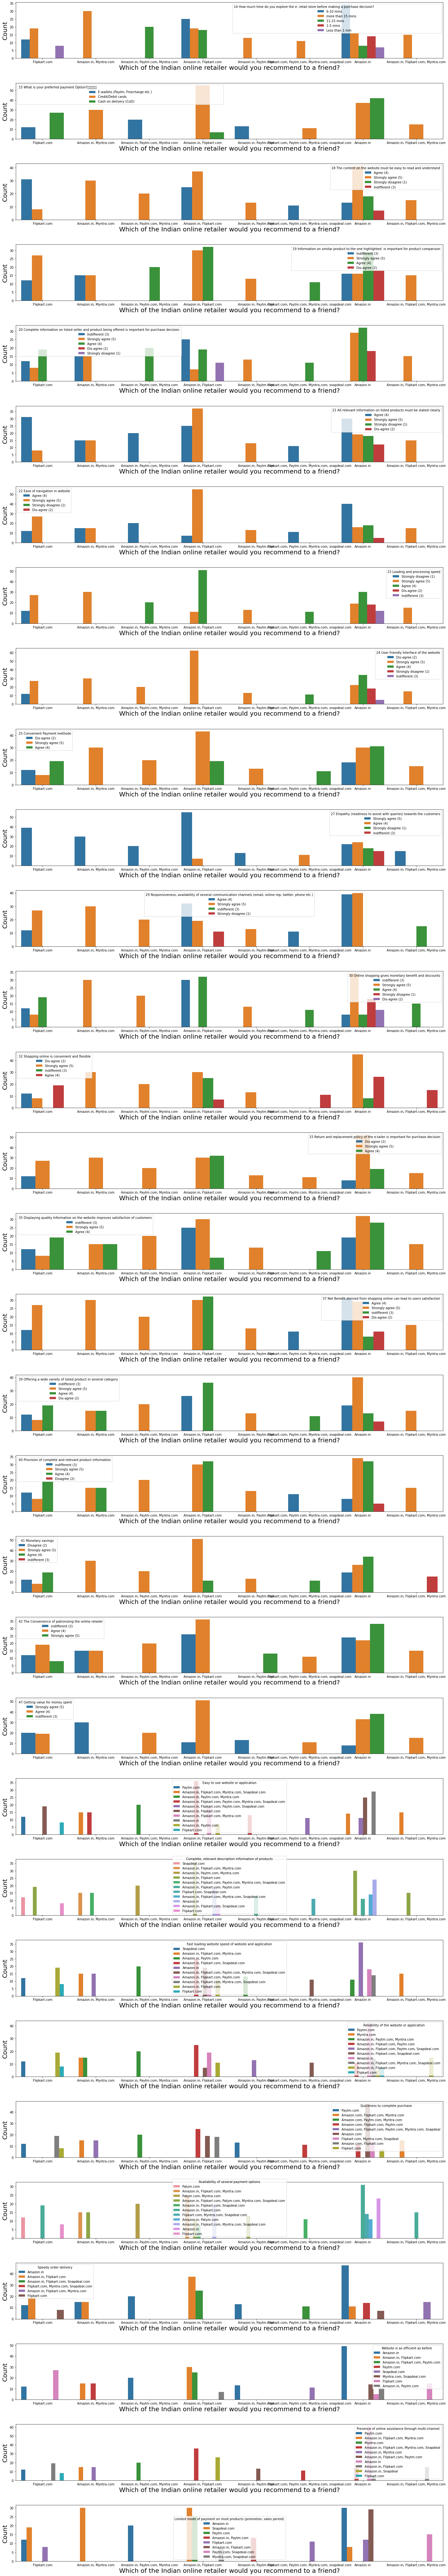

In [261]:
plt.figure(figsize=(20,120),facecolor='white')
plotnum=1
y = df[[       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ',
'18 The content on the website must be easy to read and understand','19 Information on similar product to the one highlighted  is important for product comparison','20 Complete information on listed seller and product being offered is important for purchase decision.','21 All relevant information on listed products must be stated clearly','22 Ease of navigation in website','23 Loading and processing speed','24 User friendly Interface of the website','25 Convenient Payment methods','27 Empathy (readiness to assist with queries) towards the customers','29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)','30 Online shopping gives monetary benefit and discounts','32 Shopping online is convenient and flexible','33 Return and replacement policy of the e-tailer is important for purchase decision','35 Displaying quality Information on the website improves satisfaction of customers','37 Net Benefit derived from shopping online can lead to users satisfaction','39 Offering a wide variety of listed product in several category','40 Provision of complete and relevant product information','41 Monetary savings','42 The Convenience of patronizing the online retailer','47 Getting value for money spent','Easy to use website or application','Complete, relevant description information of products','Fast loading website speed of website and application','Reliability of the website or application','Quickness to complete purchase','Availability of several payment options','Speedy order delivery ','Website is as efficient as before','Presence of online assistance through multi-channel','Limited mode of payment on most products (promotion, sales period)']]
X = df['Which of the Indian online retailer would you recommend to a friend?']
for col in y:
    if plotnum<=34:
        plt.subplot(34,1,plotnum)
        sns.countplot(X,hue =y[col])
        plt.xlabel('Which of the Indian online retailer would you recommend to a friend?',fontsize=20)
        plt.ylabel('Count',fontsize=20)
        
    plotnum+=1
plt.tight_layout()

# risk for the Ecommerce websites

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Amazon.in, Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

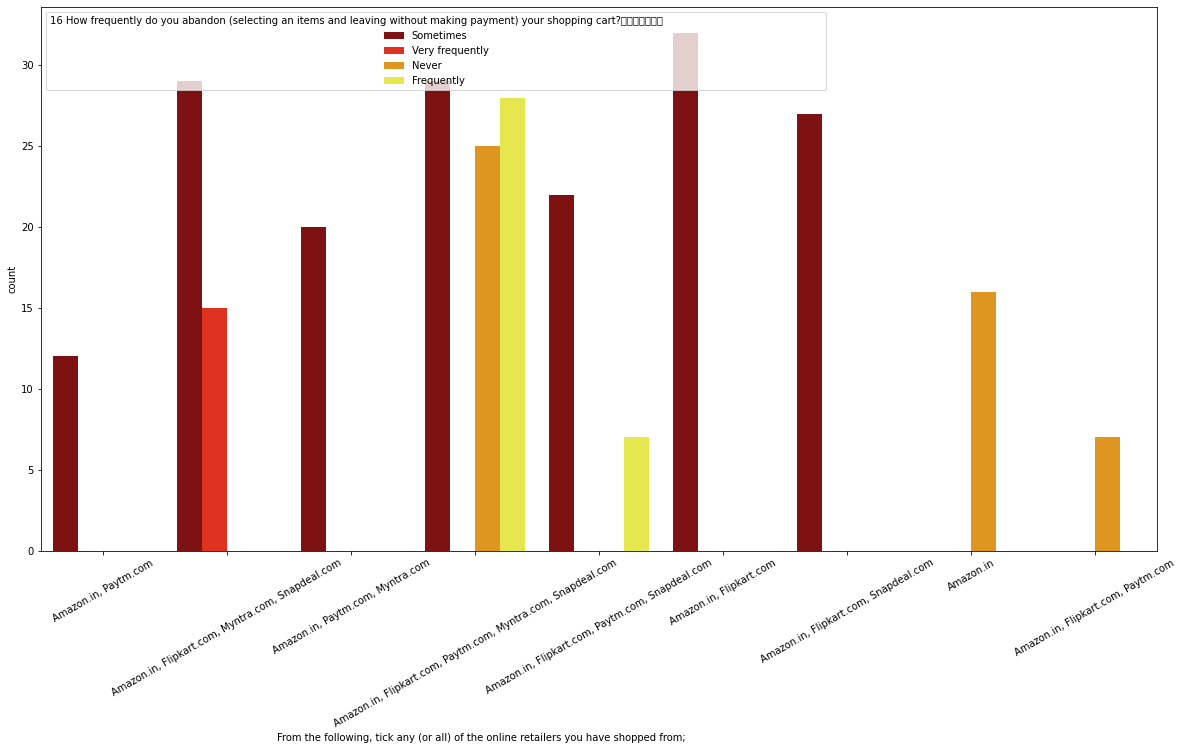

In [264]:
plt.figure(figsize=(20,10),facecolor='white')
sns.countplot(df[       'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '
],hue =df[       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '
], palette='hot')
plt.xticks(rotation=30)

# ========================THANKYOU===============================